<a href="https://colab.research.google.com/github/Naiya711/naiya711/blob/main/Project_SLC_DSBA_INNHotels_FullCode_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
# assigning authorization from colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# assigning path to fetch data file from drive
data = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# checking first five rows of data
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# checking last 5 rows of data
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [ ]:
# checking info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# checking shape of data
data.shape

(36275, 19)

In [ ]:
# checking description of data
data.describe(include='all')

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
count       36275   36275.00000     36275.00000           36275.00000   
unique      36275           NaN             NaN                   NaN   
top      INN00001           NaN             NaN                   NaN   
freq            1           NaN             NaN                   NaN   
mean          NaN       1.84496         0.10528               0.81072   
std           NaN       0.51871         0.40265               0.87064   
min           NaN       0.00000         0.00000               0.00000   
25%           NaN       2.00000         0.00000               0.00000   
50%           NaN       2.00000         0.00000               1.00000   
75%           NaN       2.00000         0.00000               2.00000   
max           NaN       4.00000        10.00000               7.00000   

        no_of_week_nights type_of_meal_plan  required_car_parking_space  \
count         36275.00000             36275                 36275.00000   
unique                NaN                 4                         NaN   
top                   NaN       Meal Plan 1                         NaN   
freq                  NaN             27835                         NaN   
mean              2.20430               NaN                     0.03099   
std               1.41090               NaN                     0.17328   
min               0.00000               NaN                     0.00000   
25%               1.00000               NaN                     0.00000   
50%               2.00000               NaN                     0.00000   
75%               3.00000               NaN                     0.00000   
max              17.00000               NaN                     1.00000   

       room_type_reserved   lead_time  arrival_year  arrival_month  \
count               36275 36275.00000   36275.00000    36275.00000   
unique                  7         NaN           NaN            NaN   
top           Room_Type 1         NaN           NaN            NaN   
freq                28130         NaN           NaN            NaN   
mean                  NaN    85.23256    2017.82043        7.42365   
std                   NaN    85.93082       0.38384        3.06989   
min                   NaN     0.00000    2017.00000        1.00000   
25%                   NaN    17.00000    2018.00000        5.00000   
50%                   NaN    57.00000    2018.00000        8.00000   
75%                   NaN   126.00000    2018.00000       10.00000   
max                   NaN   443.00000    2018.00000       12.00000   

        arrival_date market_segment_type  repeated_guest  \
count    36275.00000               36275     36275.00000   
unique           NaN                   5             NaN   
top              NaN              Online             NaN   
freq             NaN               23214             NaN   
mean        15.59700                 NaN         0.02564   
std          8.74045                 NaN         0.15805   
min          1.00000                 NaN         0.00000   
25%          8.00000                 NaN         0.00000   
50%         16.00000                 NaN         0.00000   
75%         23.00000                 NaN         0.00000   
max         31.00000                 NaN         1.00000   

        no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
count                    36275.00000                           36275.00000   
unique                           NaN                                   NaN   
top                              NaN                                   NaN   
freq                             NaN                                   NaN   
mean                         0.02335                               0.15341   
std                          0.36833                               1.75417   
min                          0.00000                               0.00000   
25%                          0.00000       

In [ ]:
# identifying null values in data
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# identifying duplicated data
data.duplicated().sum()

0

In [ ]:
# identifying number of unique values in all columns
data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [ ]:
# identifying uniques values of no_of_previous_cancellations
data['no_of_previous_cancellations'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6])

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
#dropping booking_ID as it contains all unique value
df = data.drop('Booking_ID', axis=1)

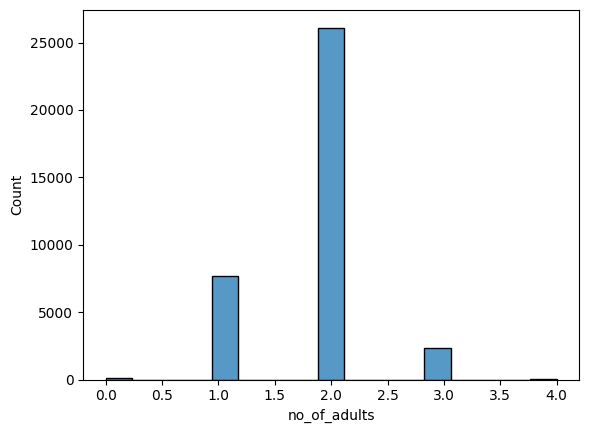

In [ ]:
# plotting no_of_adults
sns.histplot(data=df, x='no_of_adults');

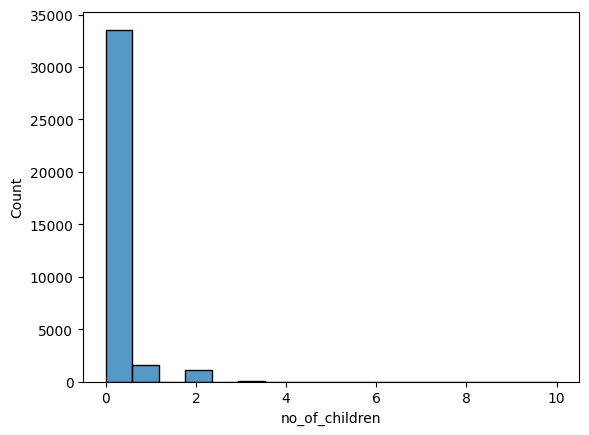

In [ ]:
# plotting no_of_children
sns.histplot(data=df, x='no_of_children');

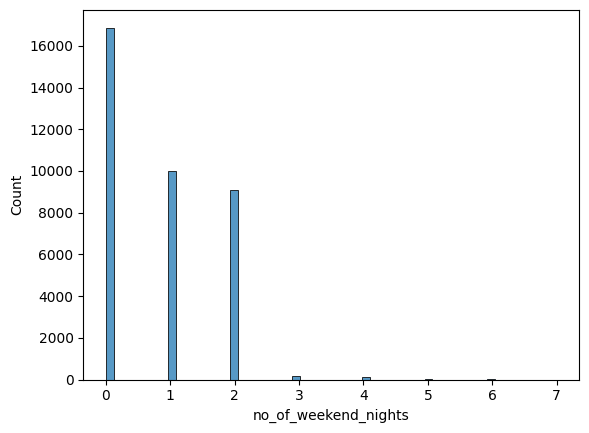

In [ ]:
# plotting no_of_weekend_nights
sns.histplot(data=df, x='no_of_weekend_nights');

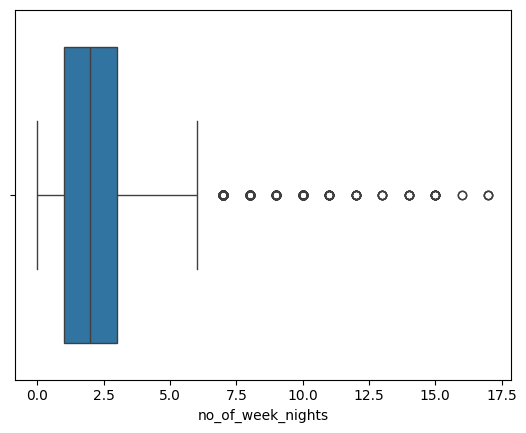

In [ ]:
# plotting no_of_week_nights
sns.boxplot(data=df, x='no_of_week_nights');

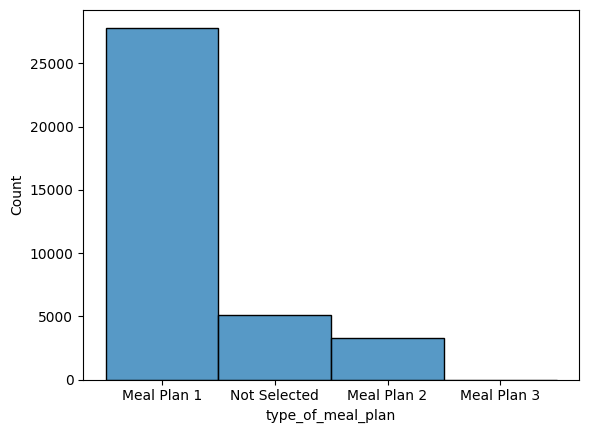

In [ ]:
# plotting type_of_meal_plan
sns.histplot(data=df, x='type_of_meal_plan');

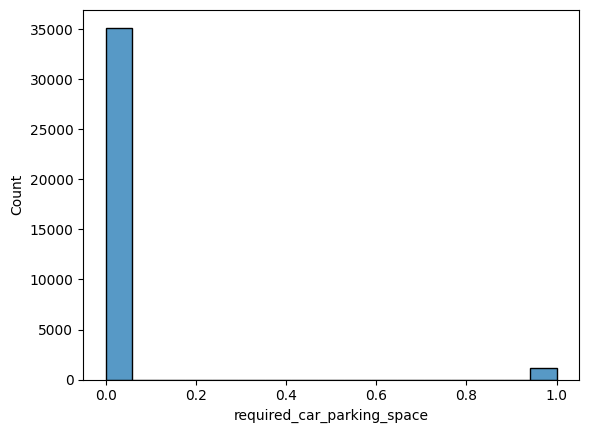

In [ ]:
# plotting required_car_parking_space
sns.histplot(data=df, x='required_car_parking_space');

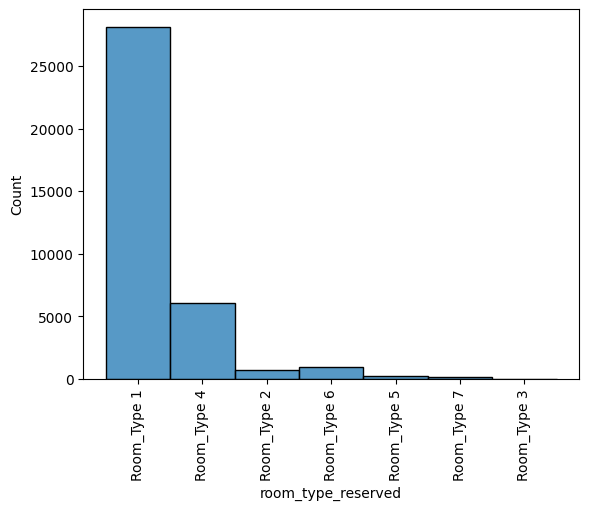

In [ ]:
# plotting room_type_reserved
sns.histplot(data=df, x='room_type_reserved')
plt.xticks(rotation=90);

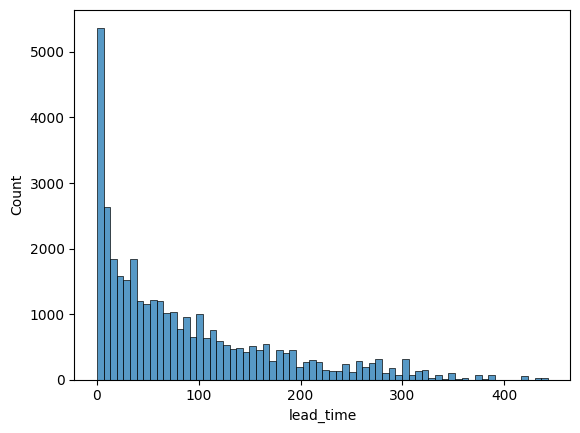

In [ ]:
# plotting lead_time
sns.histplot(data=df, x='lead_time');

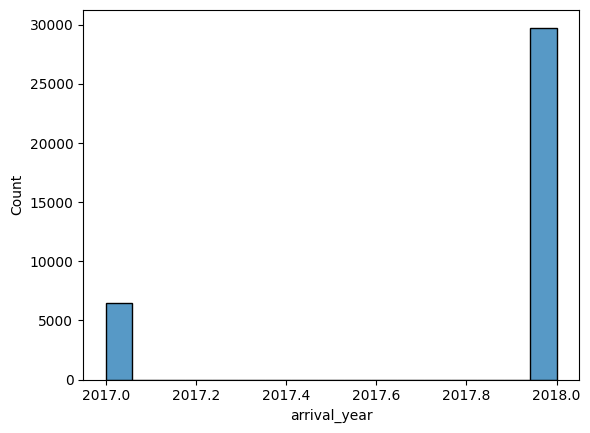

In [ ]:
# plotting arrival_year
sns.histplot(data=df, x='arrival_year');

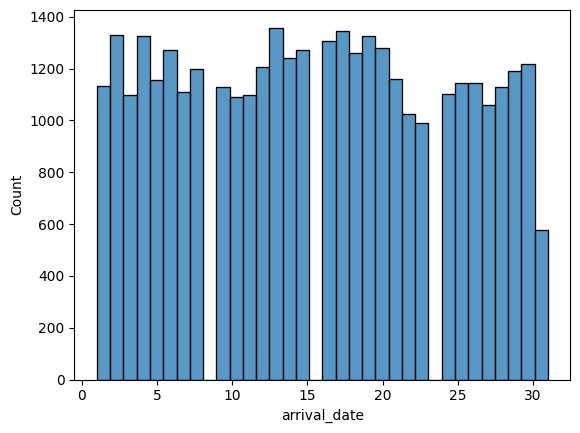

In [ ]:
# plotting arrival_date
sns.histplot(data=df, x='arrival_date');

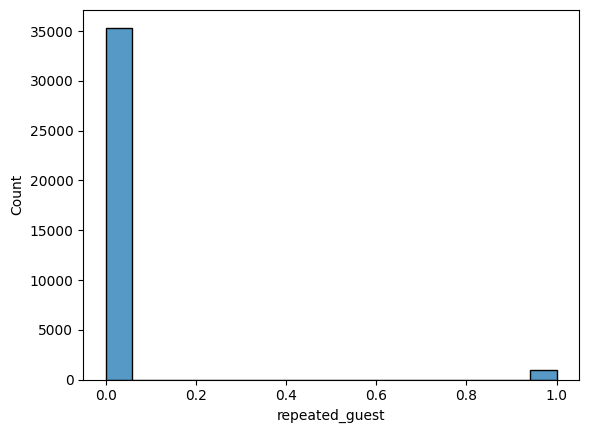

In [ ]:
# plotting repeated_guests
sns.histplot(data=df, x='repeated_guest');

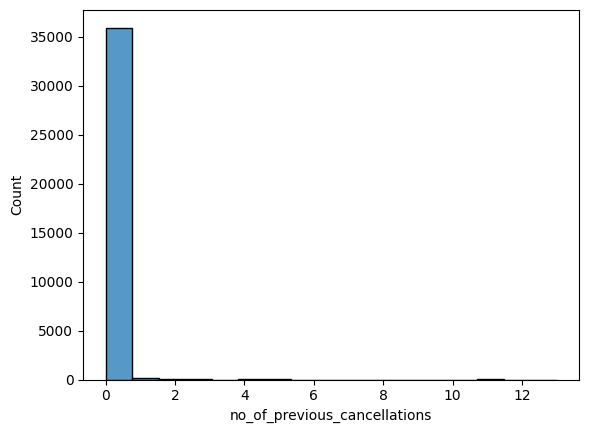

In [ ]:
# plotting no_of_previous_cancellations
sns.histplot(data=df, x='no_of_previous_cancellations');

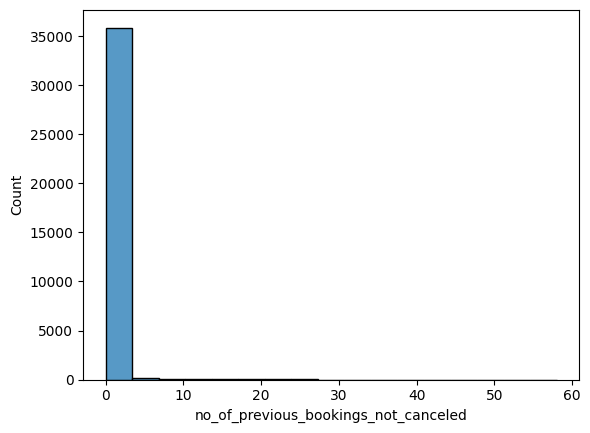

In [ ]:
# plotting no_of_previous_bookings_not_canceled
sns.histplot(data=df, x='no_of_previous_bookings_not_canceled');

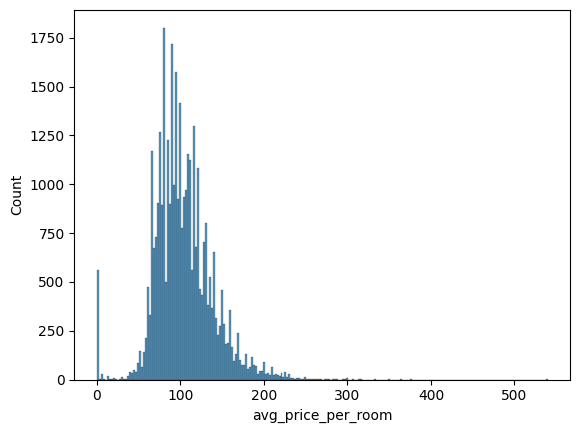

In [ ]:
# plotting avg_price_per_room
sns.histplot(data=df, x='avg_price_per_room');

In [ ]:
# total value count of no_of_special_requests
df['no_of_special_requests'].value_counts()

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

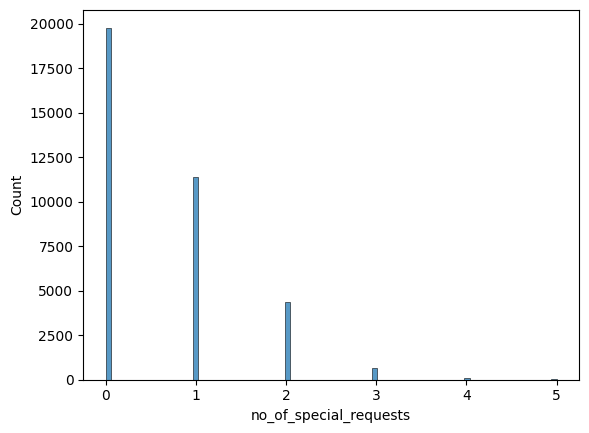

In [ ]:
# plotting no_of_special_requests
sns.histplot(data=df, x='no_of_special_requests');

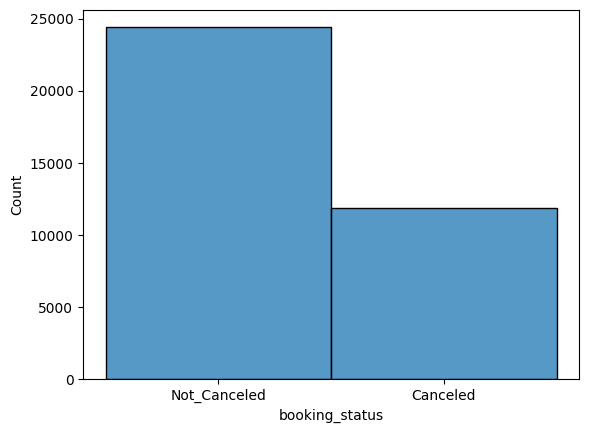

In [ ]:
# plotting booking_status
sns.histplot(data=df, x='booking_status');

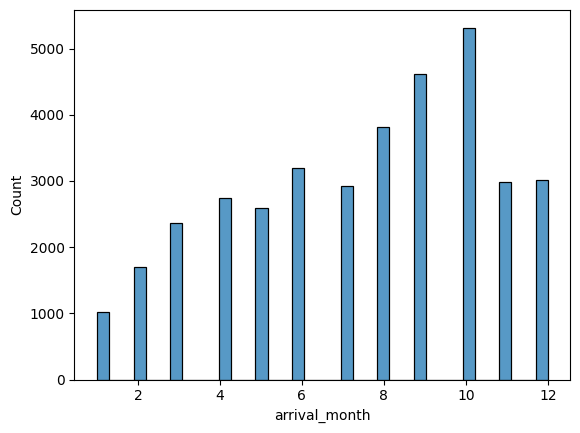

In [ ]:
# plotting arrival_month
sns.histplot(data=df, x='arrival_month');

**Question: What are the busiest months in hotel?**


Answer: starting from July, August, September, October and November where October being the most busiest months.

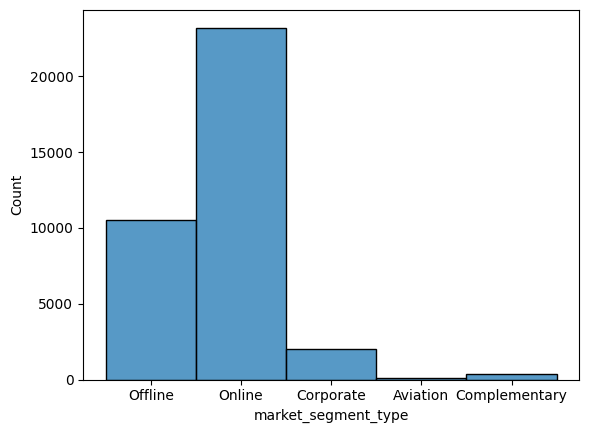

In [ ]:
# plotting market_segment_type
sns.histplot(data=df, x='market_segment_type');

**Question: Which market segment do most of the guests come from?**


Answer: Most of guests come from Online Market segment

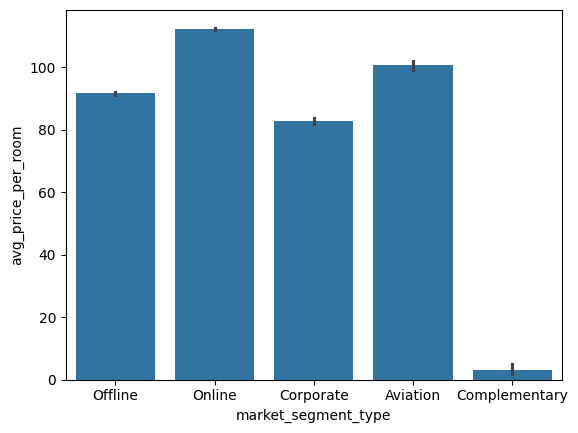

In [ ]:
# identifying avg_price_per_room on different market_segment_type
sns.barplot(data=df, x='market_segment_type', y='avg_price_per_room');

**Question: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**


Answer: Online market segment faces maximum price range for rooms in Hotel followed by Aviation and Offline segment. Corporate segment's room price is lower than Offline segment and lowest prices are offered as a complimentary to special guests.

In [ ]:
# Total count of booking status
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [ ]:
# calculating the percentage of booking got cancelled
cancelled_percentage = (df[df['booking_status'] == 'Canceled'].shape[0] / df.shape[0]) * 100
cancelled_percentage

32.76361130254997

**Question: What percentage of bookings are canceled?**


Answer: 32.76% of bookings got canceled

In [ ]:
# Calculating total repeated guests
repeated = df[df['repeated_guest']==1]

In [ ]:
# Calculating the total number cancellation came from repeated guests
cancelled_repeated_guests = repeated[repeated['booking_status'] == 'Canceled']
cancelled_percentage_repeated = (cancelled_repeated_guests.shape[0])/repeated.shape[0]*100
cancelled_percentage_repeated

1.7204301075268817

**Question: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**


Answer: 1.72% of repeating guests canceled bookings in past.

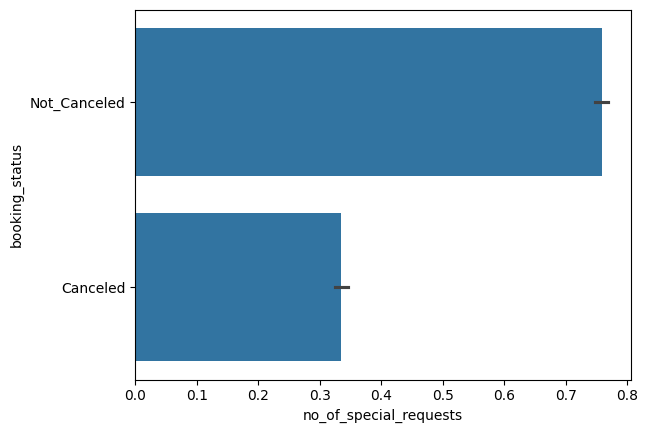

In [ ]:
# plotting comparison of 2 columns
sns.barplot(data=df, x='no_of_special_requests', y ='booking_status');

In [ ]:
# calculating number of special requests received
special_req = df[df['no_of_special_requests']>0]

In [ ]:
special_req.shape

(16498, 18)

In [ ]:
# calculating the cancellation count of special requests customers
cancellation_special_req = (special_req[special_req['booking_status']=='Canceled'].shape[0])
cancellation_special_req

3340

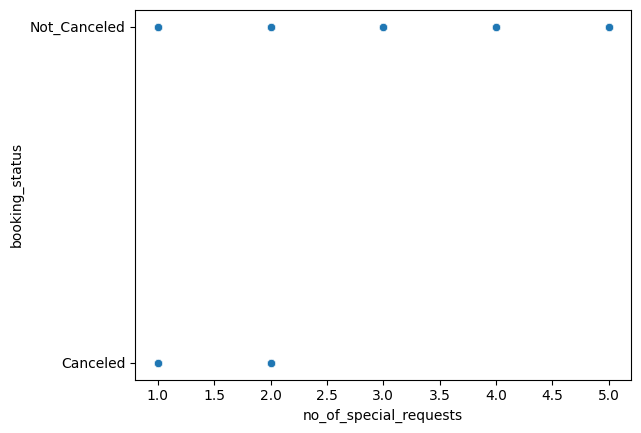

In [ ]:
# plotting comparison of two columns
sns.scatterplot(data=special_req, x='no_of_special_requests', y='booking_status');

**Question: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**


Answer: The special requirements is affecting booking cancellation as out of 16498 customers requested special arrangements, 3340 cancelled their bookings.

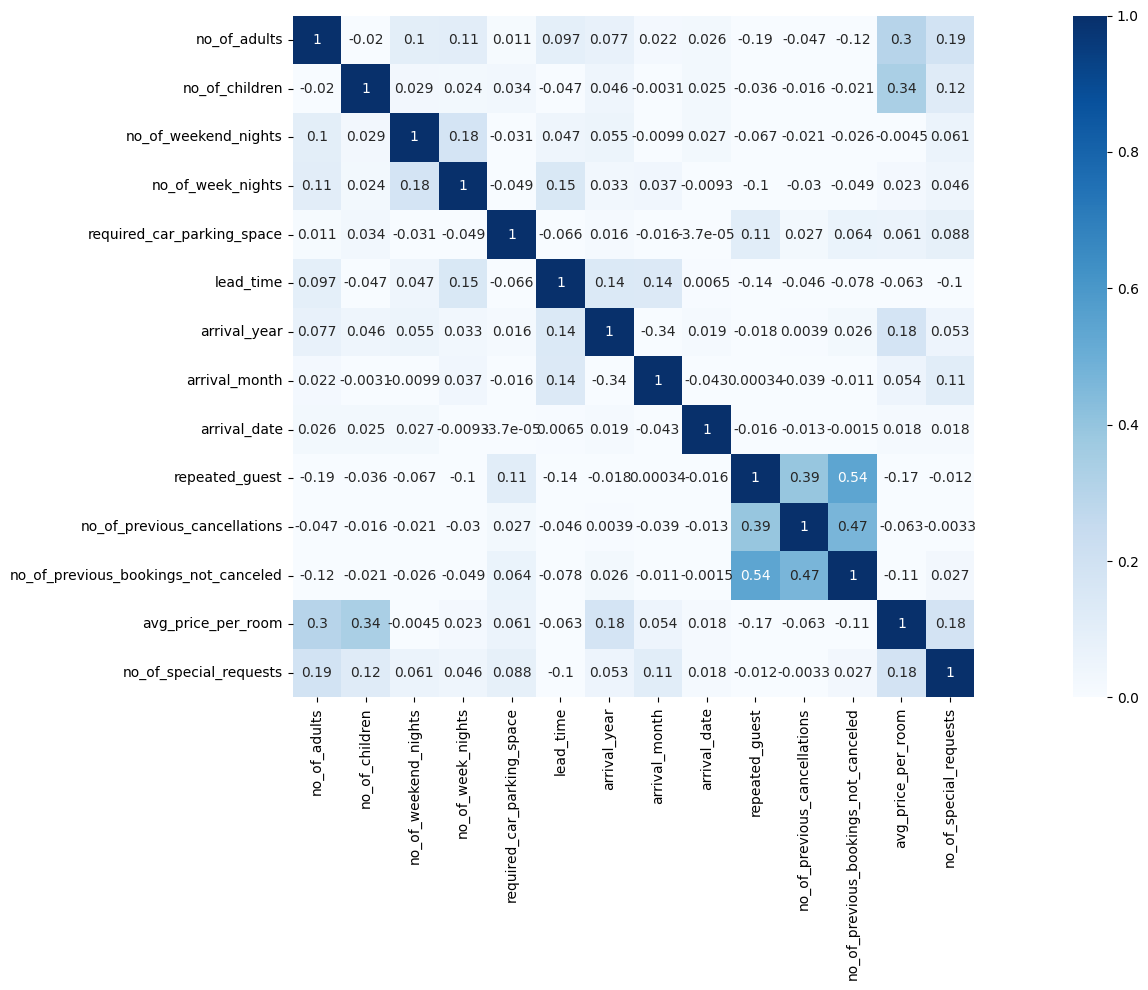

In [ ]:
# Heatmap of numeric data
df1 = df.select_dtypes(np.number)
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, cmap='Blues', square=True, vmin=0, vmax=1)
plt.tight_layout();

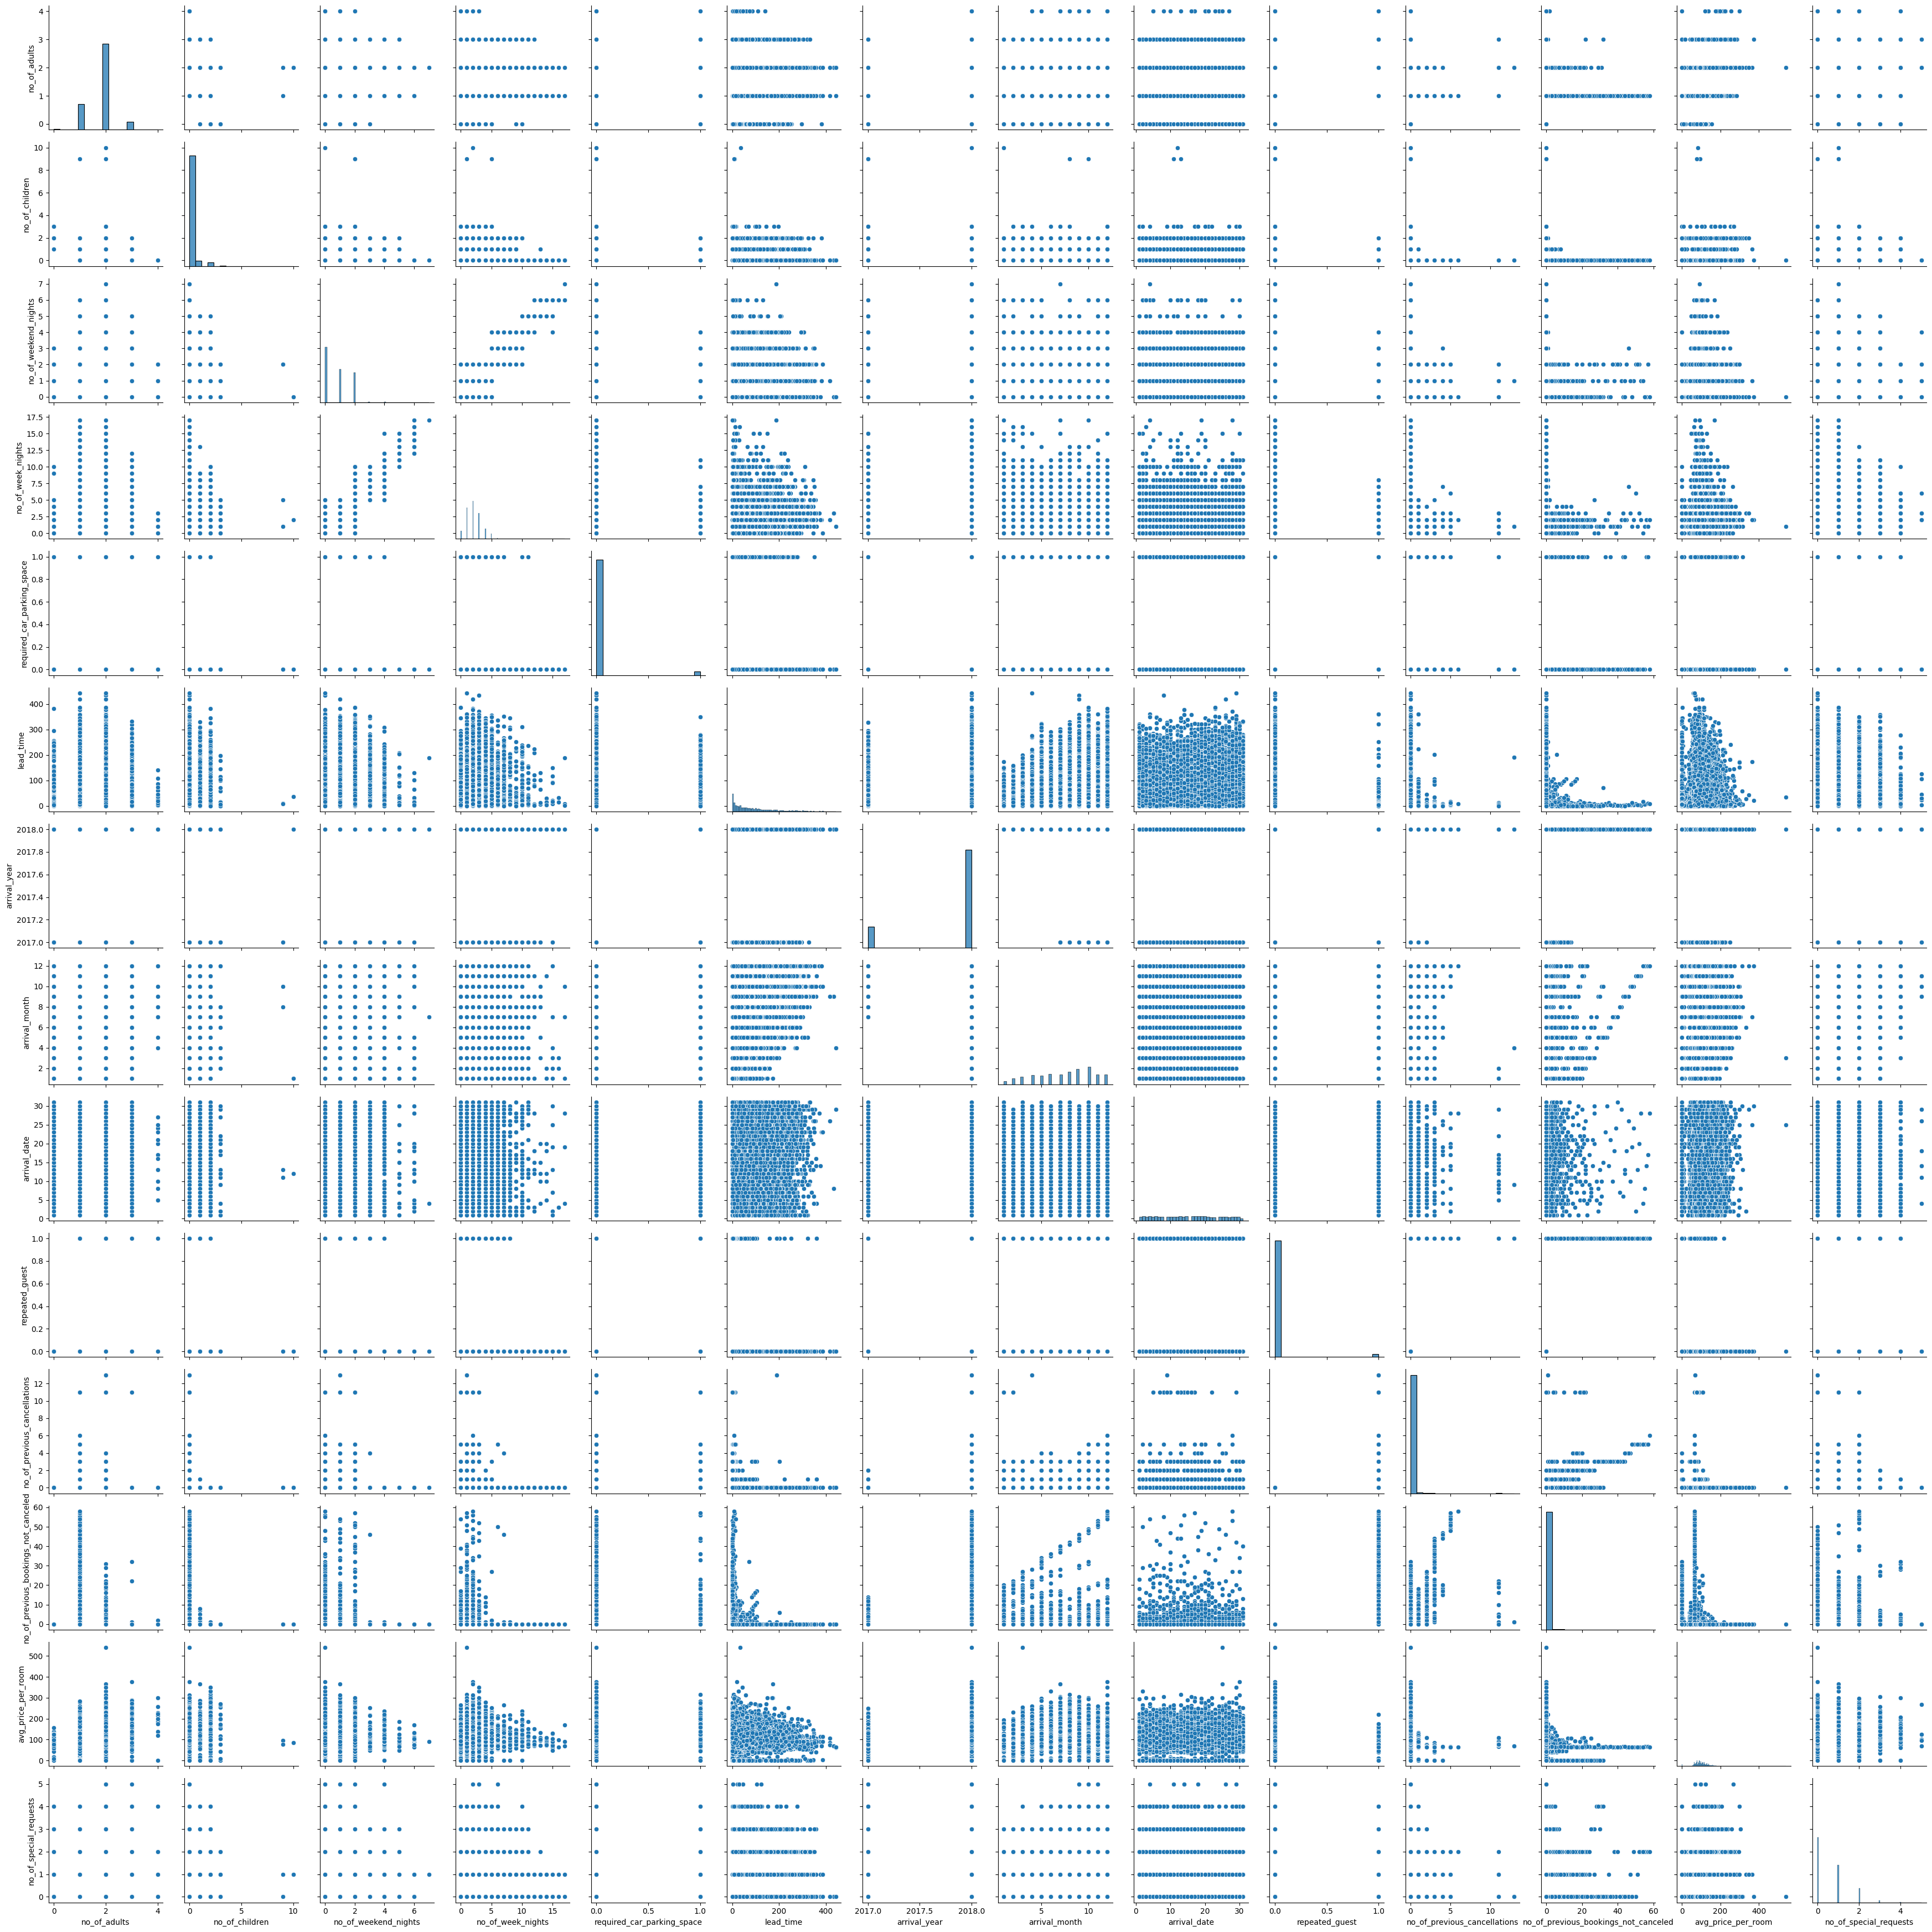

In [ ]:
# pariplot of numeric data
sns.pairplot(df)
plt.tight_layout();

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Outlier detection and treatment:**

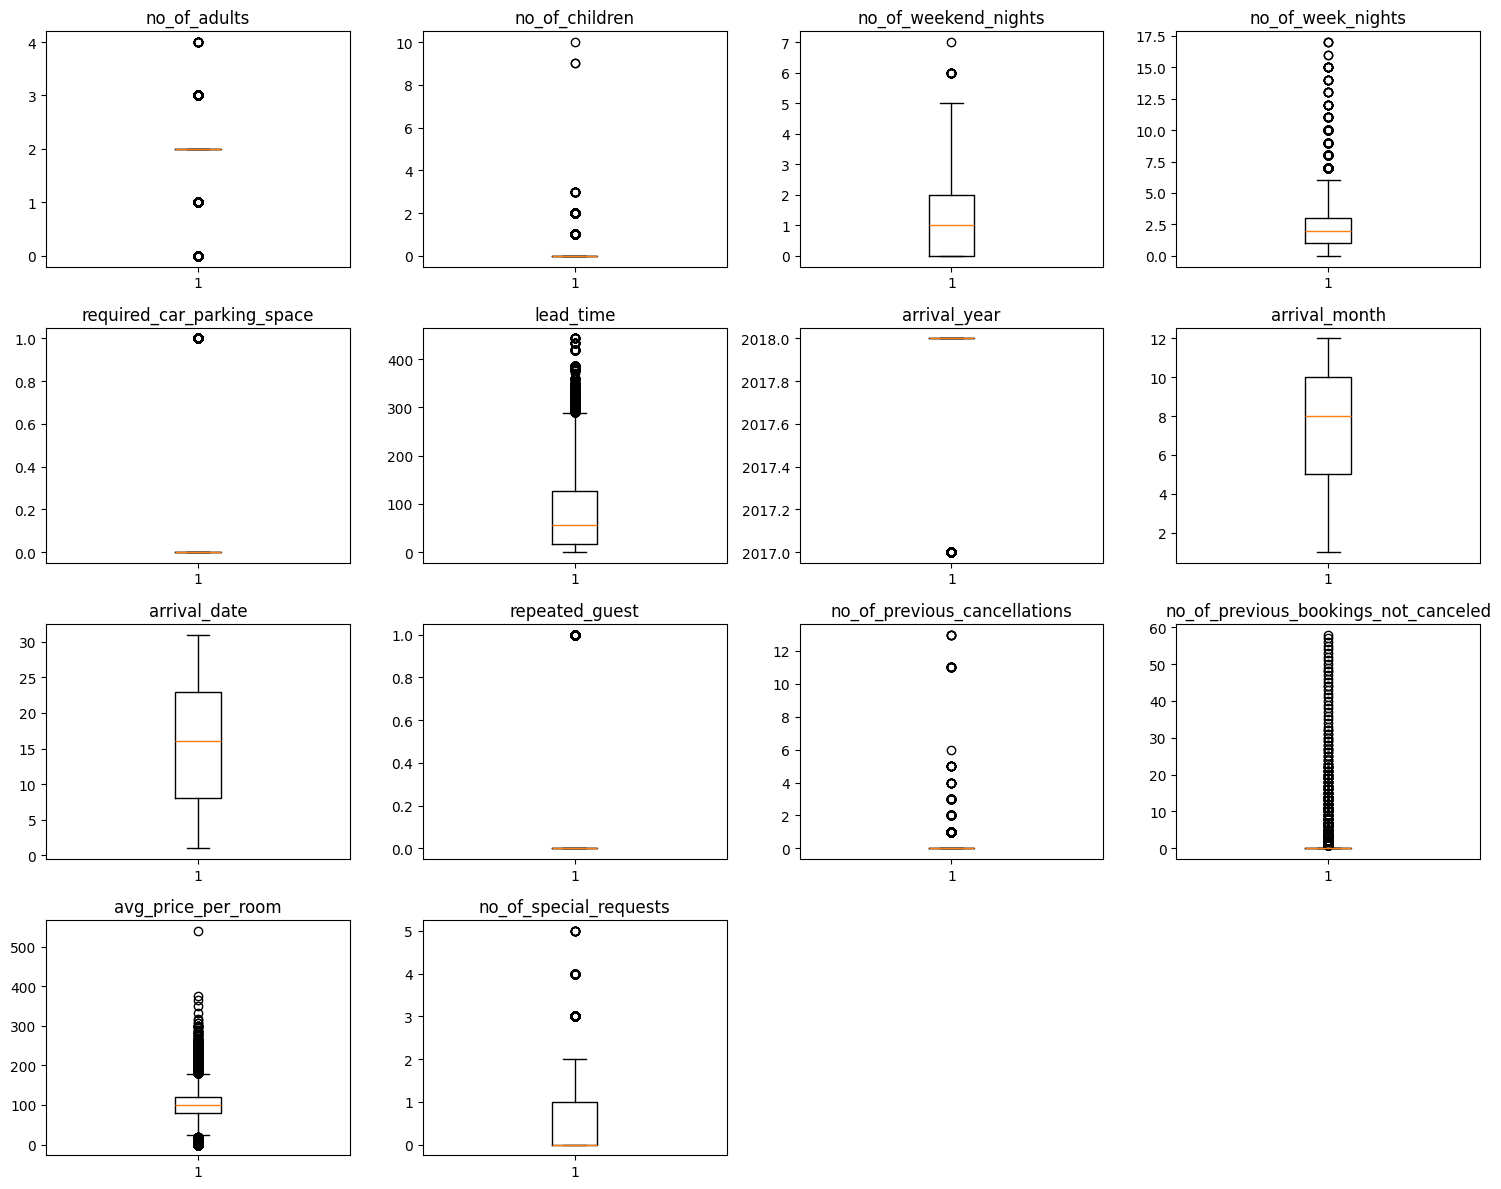

In [ ]:
#Outlier detection and treatment
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


In [ ]:
# fixing the ouliers of avg_price_per_room which is greater than 500euros
# cheking unique values of avg_price_per_room
df['avg_price_per_room'].unique()

array([ 65.  , 106.68,  60.  , ..., 118.43, 137.25, 167.8 ])

In [ ]:
# Value_count of price 0 of room
df[df["avg_price_per_room"] == 0].value_counts().sum()

545

In [ ]:
# Checking room price higher than 500 euros
df[df['avg_price_per_room']>= 500].value_counts().sum()

1

In [ ]:
# Checking for avg_price_per_room with 0 value
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

In [ ]:
# The mean price per room is 103.42 and there is one value which is higher than 500 euros, so we can fix it
# assiging the avg_price_per_room which is equal to or greater than 500 euros to replace them with upper whisker
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df['avg_price_per_room'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# replacing the avg_price_per_room value which is greater than 500 with calculated Upper Whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

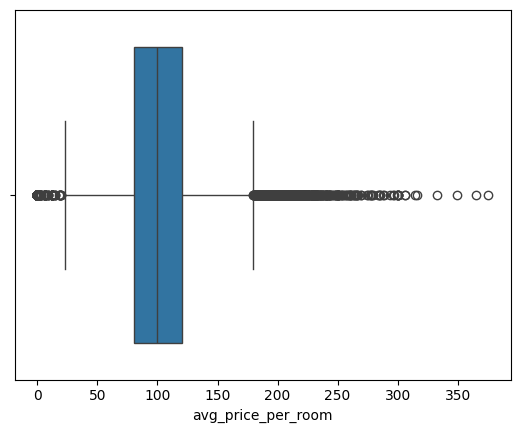

In [ ]:
# plot for avg_price_per_room
sns.boxplot(data=df, x='avg_price_per_room');

# **Data Modelling: **

In [ ]:
# Splitting data in to train and test set
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# adding constant to X
X = sm.add_constant(X)

# converting categorical variable in to numeric
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first=True,
)

# splitting train and test set in to 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=1)

In [ ]:
# Checking shape of train and test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25392, 28), (10883, 28), (25392,), (10883,))

## EDA

- It is a good idea to explore the data once again after manipulating it.

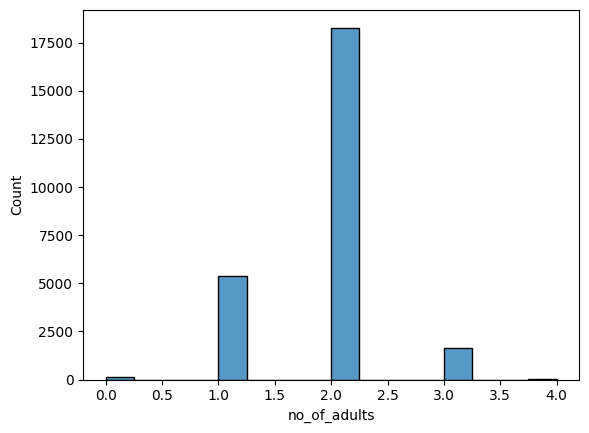

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='no_of_adults');

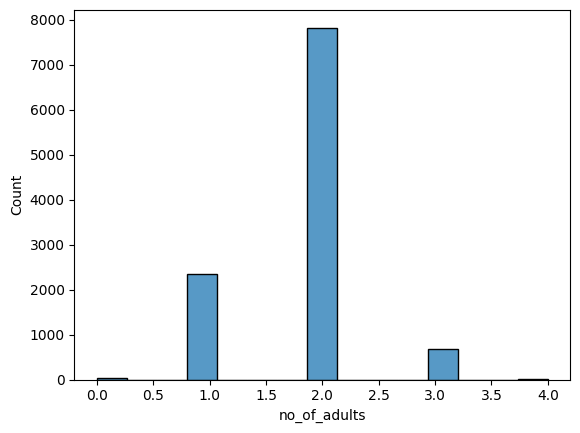

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='no_of_adults');

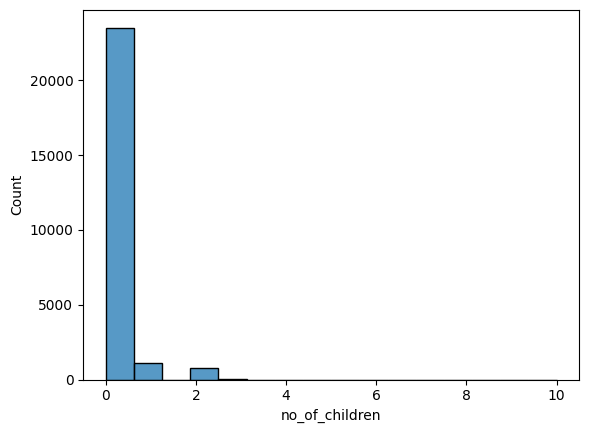

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='no_of_children');

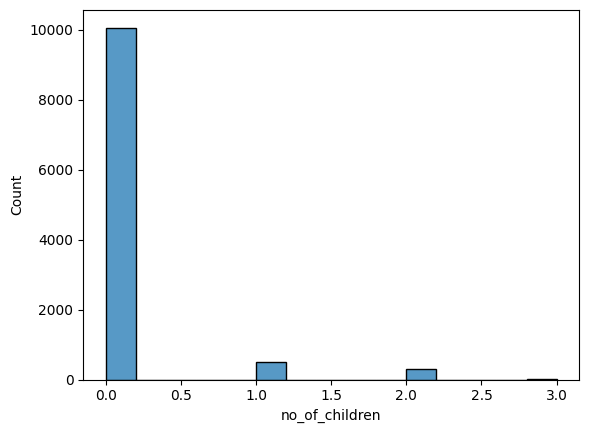

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='no_of_children');

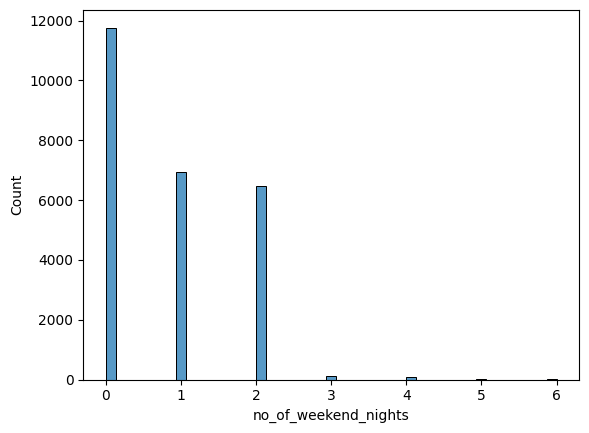

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='no_of_weekend_nights');

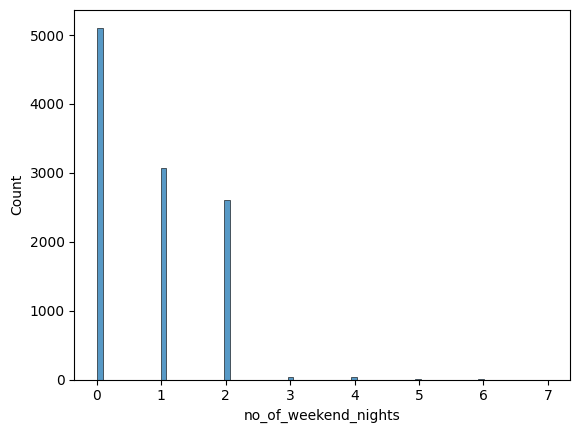

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='no_of_weekend_nights');

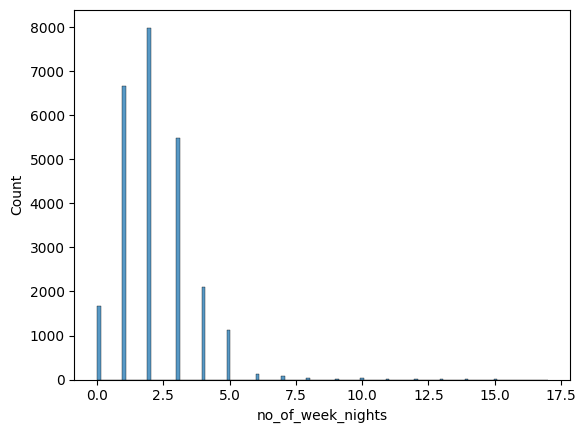

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='no_of_week_nights');

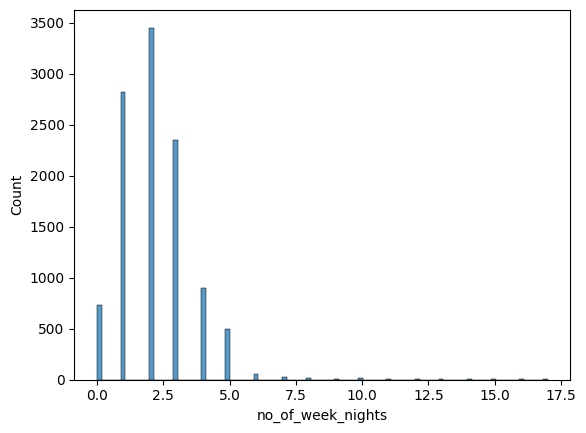

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='no_of_week_nights');

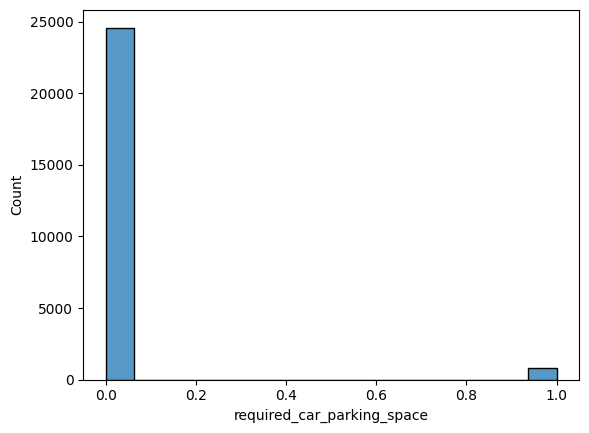

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='required_car_parking_space');

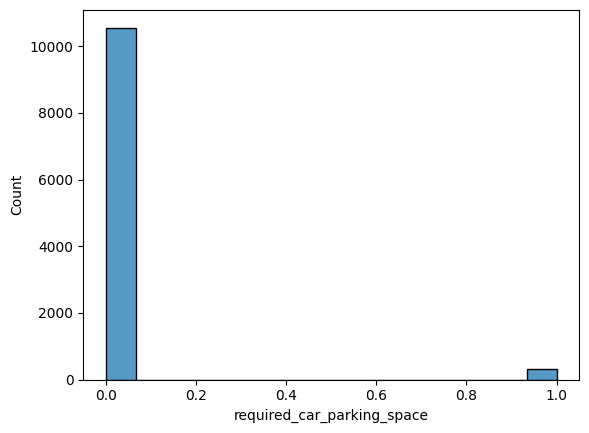

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='required_car_parking_space');

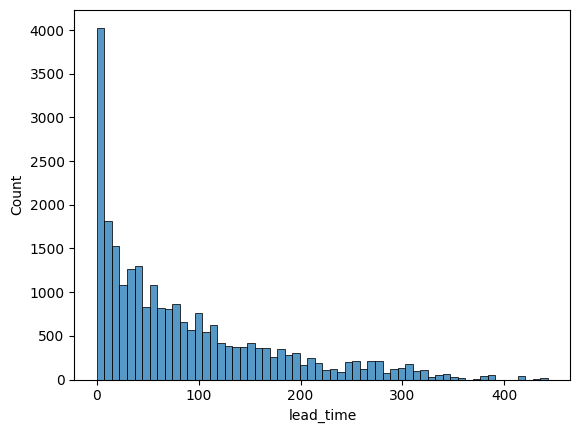

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='lead_time');

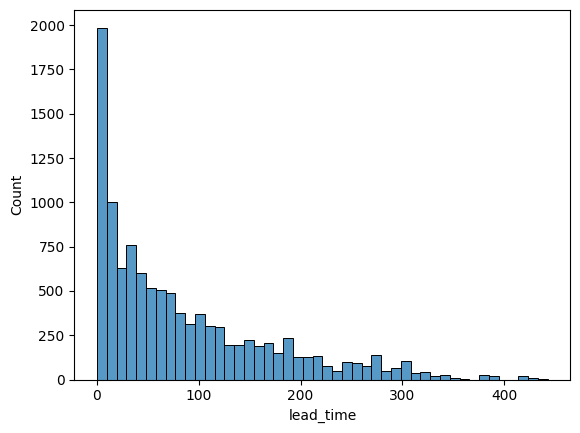

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='lead_time');

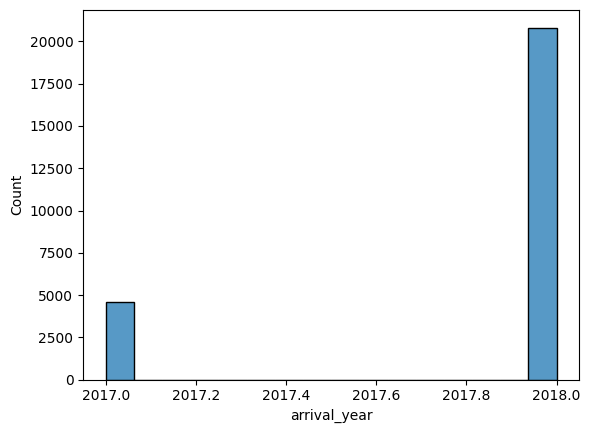

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='arrival_year');

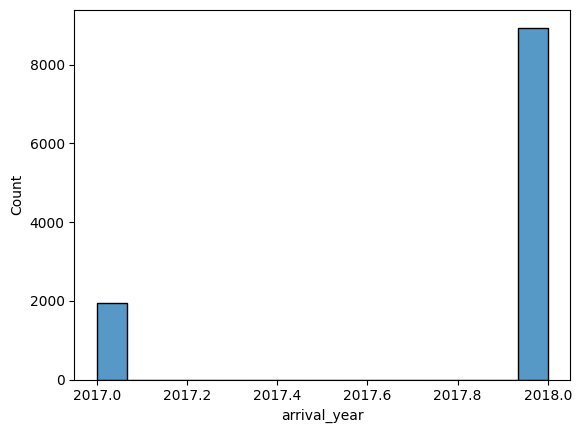

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='arrival_year');

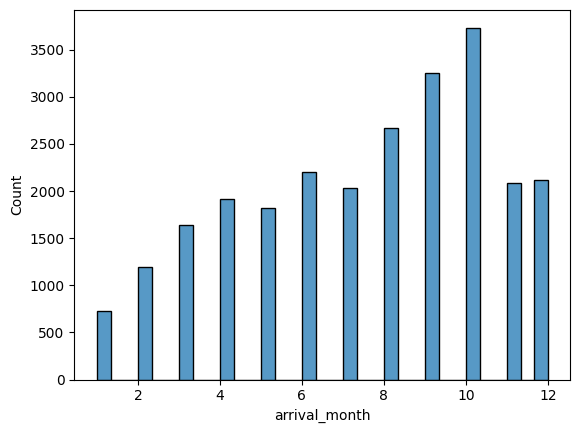

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='arrival_month');

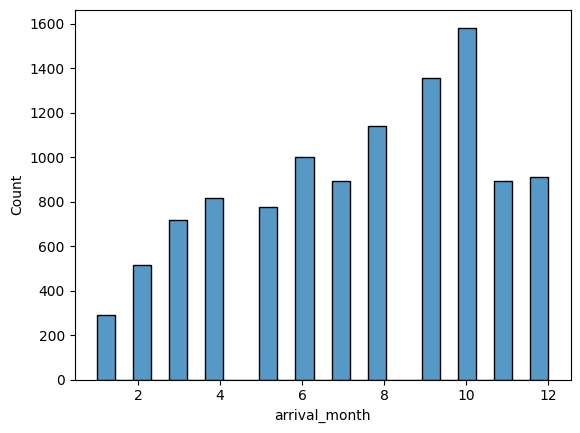

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='arrival_month');

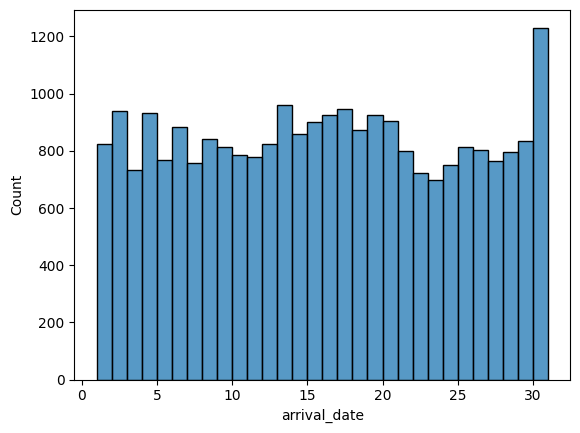

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='arrival_date');

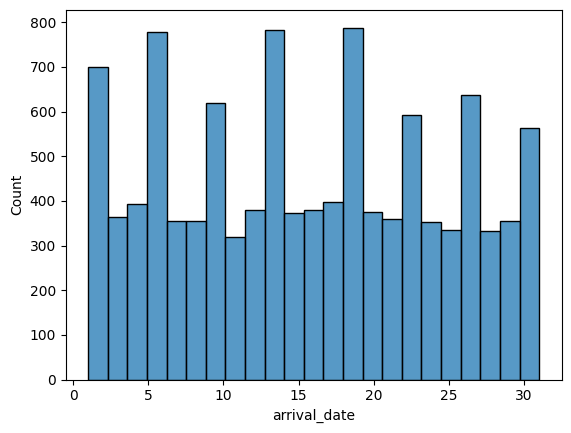

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='arrival_date');

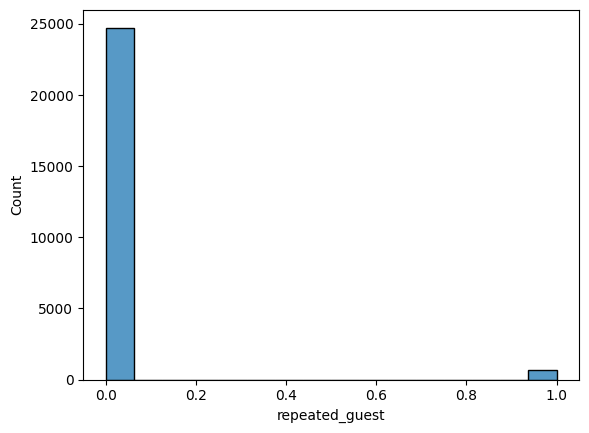

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='repeated_guest');

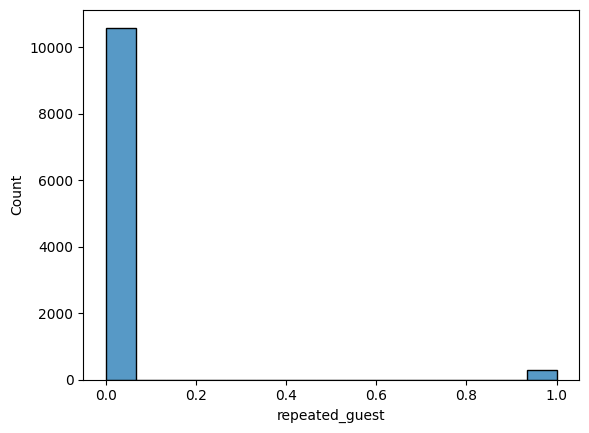

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='repeated_guest');

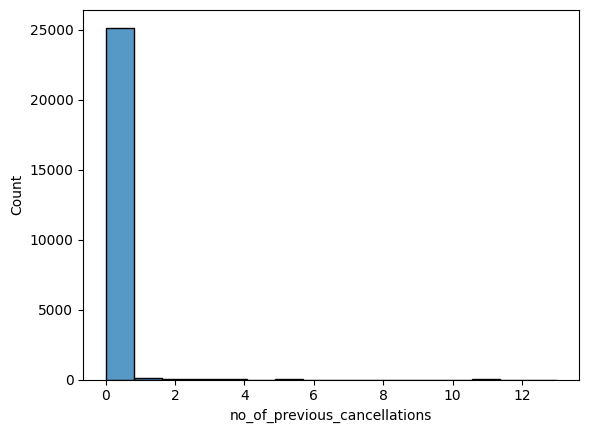

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='no_of_previous_cancellations');

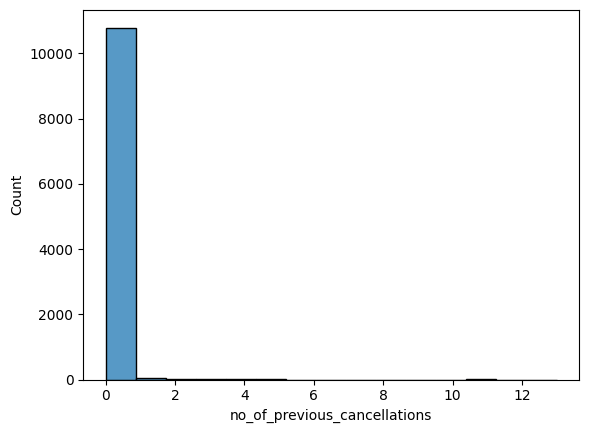

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='no_of_previous_cancellations');

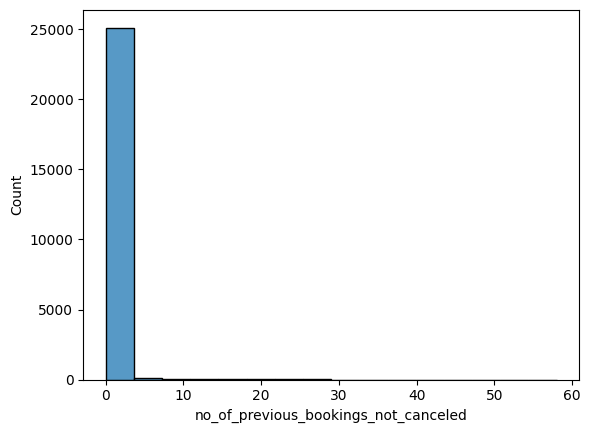

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='no_of_previous_bookings_not_canceled');

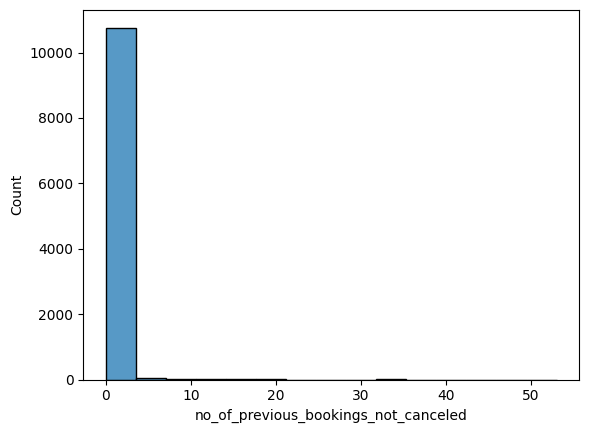

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='no_of_previous_bookings_not_canceled');

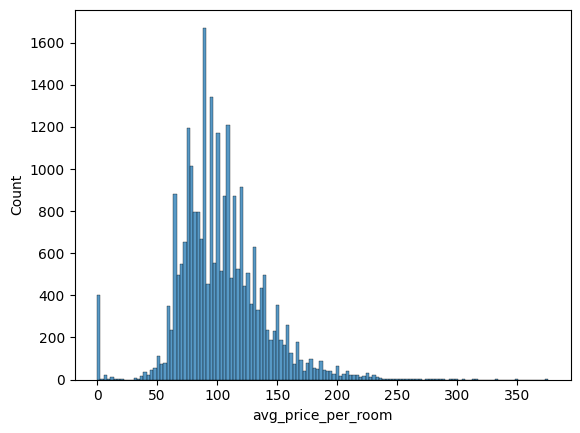

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='avg_price_per_room');

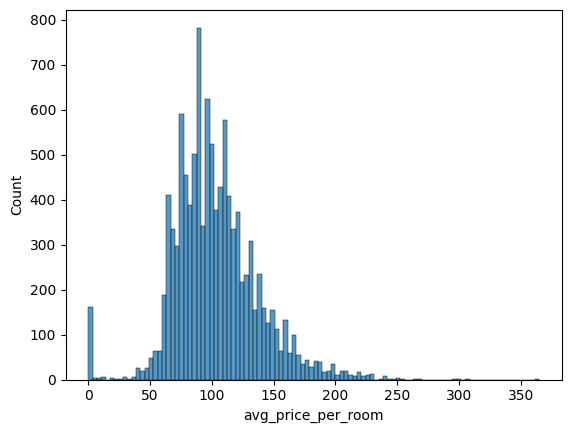

In [ ]:
# plot for test set
sns.histplot(data=X_test, x='avg_price_per_room');

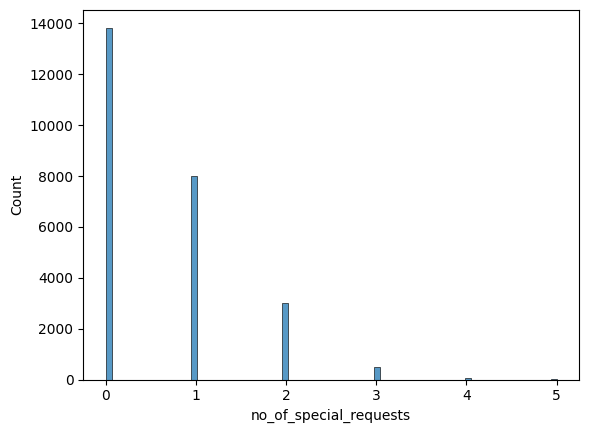

In [ ]:
# plot for train set
sns.histplot(data=X_train, x='no_of_special_requests');

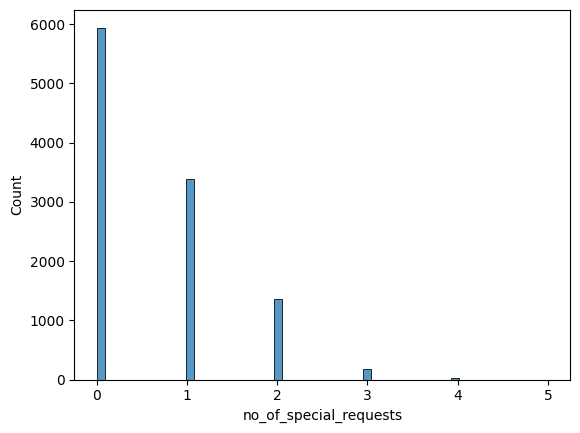

In [ ]:
# plot for test data
sns.histplot(data=X_test, x='no_of_special_requests');

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

# **Before checking Multicollinearlity, lets make logistic model:**

In [ ]:
# Convert all columns to numeric, errors='coerce' will handle non-numerical values by replacing them with NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 (or any other strategy as needed)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Explicitly convert all columns in X_train and X_test to float64
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Convert y_train to numeric if it's not already
# Assuming 'booking_status' is your target and it's categorical
y_train = pd.to_numeric(y_train.map({'Not_Canceled': 0, 'Canceled': 1})).astype(int)
y_test = pd.to_numeric(y_test.map({'Not_Canceled': 0, 'Canceled': 1})).astype(int)

# Now fit the model
logit = sm.Logit(y_train, X_train)
result = logit.fit()
print(result.summary())

         Current function value: 0.425075
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.3292
Time:                        22:36:09   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928



**Checking for Multicollinearity with VIF:**

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
# putting X_train in function to view vif values
checking_vif(X_train.astype(float))

feature            VIF
0                                  const 39491186.47744
1                           no_of_adults        1.34849
2                         no_of_children        1.97862
3                   no_of_weekend_nights        1.06949
4                      no_of_week_nights        1.09567
5             required_car_parking_space        1.03998
6                              lead_time        1.39518
7                           arrival_year        1.43167
8                          arrival_month        1.27637
9                           arrival_date        1.00674
10                        repeated_guest        1.78361
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06421
14                no_of_special_requests        1.24730
15         type_of_meal_plan_Meal Plan 2        1.27325
16         type_of_meal_plan_Meal Plan 3        1.02522
17        type_of_meal_plan_Not Selected        1.27252
18        room_type_reserved_Room_Type 2        1.10151
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36261
21        room_type_reserved_Room_Type 5        1.02797
22        room_type_reserved_Room_Type 6        1.97490
23        room_type_reserved_Room_Type 7        1.11559
24     market_segment_type_Complementary        4.50229
25         market_segment_type_Corporate       16.92846
26           market_segment_type_Offline       64.11425
27            market_segment_type_Online       71.17686

**We will drop column = 'Market_segment_type_online' and check for vif value.**

In [ ]:
# dropping the columns having vif values greater than 5
col_to_drop = ['market_segment_type_Online']
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(tuple(col_to_drop))]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(tuple(col_to_drop))]

# checking vif now
vif = checking_vif(X_train2.astype(float))
vif

feature            VIF
0                                  const 39414191.49820
1                           no_of_adults        1.33213
2                         no_of_children        1.97775
3                   no_of_weekend_nights        1.06905
4                      no_of_week_nights        1.09512
5             required_car_parking_space        1.03984
6                              lead_time        1.39090
7                           arrival_year        1.42921
8                          arrival_month        1.27532
9                           arrival_date        1.00672
10                        repeated_guest        1.78029
11          no_of_previous_cancellations        1.39545
12  no_of_previous_bookings_not_canceled        1.65175
13                    avg_price_per_room        2.06336
14                no_of_special_requests        1.24244
15         type_of_meal_plan_Meal Plan 2        1.27289
16         type_of_meal_plan_Meal Plan 3        1.02522
17        type_of_meal_plan_Not Selected        1.27072
18        room_type_reserved_Room_Type 2        1.10134
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.35709
21        room_type_reserved_Room_Type 5        1.02797
22        room_type_reserved_Room_Type 6        1.97456
23        room_type_reserved_Room_Type 7        1.11547
24     market_segment_type_Complementary        1.34086
25         market_segment_type_Corporate        1.52800
26           market_segment_type_Offline        1.59887

**All vif values are under 5 now**


**Let's check for p-value and drop the columns which are having p-value above 0.05 **

In [ ]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2.astype(float)[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
# assigning variable to new selected features data
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [ ]:
# checking the summary of new train data after resolving multicollinearity
logit1 = sm.Logit(y_train, X_train3.astype(float))
result1 = logit1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.425716
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.3282
Time:                        22:36:12   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.8647    120.456     -7.612    

**Conclusion on coefficient:**

1. The booking cancellations is directly proportional to no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Meal plan 2, type_of_meal_plan_Not Selected, so increase in above variables will lead to increase in chances of booking cancellation

2. The booking cancellations is inversely proportional to required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, room_type_reserved_Room_Type 2, room_type_reserved_room_type 4, room_type_reserved_Room_type 5, room_type_reserved_room_type_6, room_type_reserved_Room_type 7, market_segment_type_Corporate, market_segment_type_Offline, so increase in above variables will lead to decrease in chances of booking cancellations

**Now, all p_values are below 0.05**

In [ ]:
# defining model_performance_classification_statsmodels to check performances of train and test data
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute and print the classification model performance metrics.

    Args:
        model: A fitted statsmodels model object.
        predictors: The predictor variables used in the model.
        target: The target variable.
        threshold: The probability threshold for classification.

    Returns:
        A dictionary containing the performance metrics.
    """

    # Get predicted probabilities
    pred_probs = model.predict(predictors)

    # Convert probabilities to class predictions using the threshold
    pred_class = (pred_probs >= threshold).astype(int)

    # Compute performance metrics
    accuracy = accuracy_score(target, pred_class)
    precision = precision_score(target, pred_class)
    recall = recall_score(target, pred_class)
    f1 = f1_score(target, pred_class)
    roc_auc = roc_auc_score(target, pred_probs)

    # Create confusion matrix
    cm = confusion_matrix(target, pred_class)

    # Store metrics in a dictionary
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC Score": roc_auc,
        "Confusion Matrix": cm
    }

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:")
    print(cm)

    # Return the metrics dictionary
    return metrics

In [ ]:
# defining model_performance_classification_statsmodels to check performances of train and test data
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    Creates and prints the confusion matrix for a statsmodels logistic regression model.

    Args:
        model: A fitted statsmodels model object.
        predictors: The predictor variables used in the model.
        target: The target variable.
        threshold: The probability threshold for classification.

    Returns:
        None (Prints the confusion matrix)
    """

    # Get predicted probabilities
    pred_probs = model.predict(predictors)

    # Convert probabilities to class predictions using the threshold
    pred_class = (pred_probs >= threshold).astype(int)

    # Create and print confusion matrix
    cm = confusion_matrix(target, pred_class)
    print("Confusion Matrix:")
    print(cm)

## Model performance evaluation

**We will calculate odds and odds ratio:**

In [ ]:
# converting coefficients to odds
odds = np.exp(result1.params)

# finding the percentage change
perc_change_odds = (np.exp(result1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11487         1.16411               1.11466   
Change_odd% -100.00000      11.48701        16.41072              11.46616   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04260                     0.20298    1.01583   
Change_odd%            4.25996                   -79.70242    1.58342   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57291        0.95841         0.06484   
Change_odd%      57.29054       -4.15858       -93.51608   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25705             1.01937   
Change_odd%                      25.70460             1.93739   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22993                        1.17855   
Change_odd%               -77.00672                       17.85489   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33103                         0.70069   
Change_odd%                        33.10347                       -29.93109   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75327                         0.47893   
Change_odd%                       -24.67346                       -52.10654   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.38034                         0.23840   
Change_odd%                       -61.96631                       -76.15999   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45262                      0.16771  
Change_odd%                      -54.73798                    -83.22899

**Observartions:**


Interpretation of odds ratio in regards to booking cancellation:
1. no_of_adults: Holding all other features constant, a unit change in no_of_adults will increase 1.11 or 11.48% odds in booking cancellation
2. no_of_children: Holding all other features constant, a unit change in no_of_children will increase 1.16 or 16.41% odds in booking cancellation
3. no_of_weekend_nights: Holding all other features constant, a unit change in no_of_weekend_nights will increase 1.11 or 11.46% odds in booking cancellation
4. no_of_week_nights: Holding all other features constant, a unit change in no_of_week_nights will increase 1.04 or 4.25% odds in booking cancellation
5. required_car_parking_space: Holding all other features constant, a unit change in variable will decrease 79.70% odds in booking cancellation
6. lead_time: Holding all other features constant, a unit change in variable will increase 1.01 or 1.58% odds in booking cancellation
7. arrival_year: Holding all other features constant, a unit change in variable will increase 1.57 or 57.29% odds in booking cancellation
8. arrival_month: Holding all other features constant, a unit change in variable will increase 0.95 or decrease 4.15% odds in booking cancellation
9. repeated_guest: Holding all other features constant, a unit change in variable will decrease 93.5% odds in booking cancellation
10. no_of_previous_cancellation: Holding all other features constant, a unit change in variable will increase 1.25 or 25.70% odds in booking cancellation
11. avg_price_per_room: Holding all other features constant, a unit change in variable will increase 1.01 or 1.93% odds in booking cancellation
12. no_of_special_requests: Holding all other features constant, a unit change in variable will decrease 77% odds in booking cancellation
13. type_of_meal_2: Holding all other features constant, a unit change in variable will increase 1.17 or 17.85% odds in booking cancellation
14. type_of_meal_not_selected: Holding all other features constant, a unit change in variable will increase 1.33 or 33.10% odds in booking cancellation
15. room_type_reserved_type_2: Holding all other features constant, a unit change in variable will decrease 29.93% odds in booking cancellation
16. room_type_4: Holding all other features constant, a unit change in variable will decrease 24.67% odds in booking cancellation
17. room_type_5: Holding all other features constant, a unit change in variable will decrease 52.10% odds in booking cancellation
18. room_type_6: Holding all other features constant, a unit change in variable will decrease 61.96% odds in booking cancellation
19. room_type_7: Holding all other features constant, a unit change in variable will decrease 76.15% odds in booking cancellation
20. market_segment_type_corporate: Holding all other features constant, a unit change in variable will decrease 54.73% odds in booking cancellation
21. market_segment_type_offline: Holding all other features constant, a unit change in variable will decrease 83.22% odds in booking cancellation



In [ ]:
# Checking default training performance
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(result1, X_train3.astype(float), y_train)
log_reg_model_train_perf

Training performance:
Accuracy: 0.805371770636421
Precision: 0.7389967863630013
Recall: 0.6324285543465263
F1 Score: 0.6815721649484536
ROC AUC Score: 0.8626354608856783
Confusion Matrix:
[[15161  1868]
 [ 3074  5289]]


{'Accuracy': 0.805371770636421,
 'Precision': 0.7389967863630013,
 'Recall': 0.6324285543465263,
 'F1 Score': 0.6815721649484536,
 'ROC AUC Score': 0.8626354608856783,
 'Confusion Matrix': array([[15161,  1868],
        [ 3074,  5289]])}

In [ ]:
# Checking default testing performance
print("Testing Performance")

log_reg_model_test_perf = model_performance_classification_statsmodels(result1, X_test3.astype(float), y_test)
log_reg_model_test_perf

Testing Performance
Accuracy: 0.8046494532757512
Precision: 0.729002624671916
Recall: 0.6308915388983533
F1 Score: 0.6764079147640791
ROC AUC Score: 0.8637059495456239
Confusion Matrix:
[[6535  826]
 [1300 2222]]


{'Accuracy': 0.8046494532757512,
 'Precision': 0.729002624671916,
 'Recall': 0.6308915388983533,
 'F1 Score': 0.6764079147640791,
 'ROC AUC Score': 0.8637059495456239,
 'Confusion Matrix': array([[6535,  826],
        [1300, 2222]])}

**ROC curve on Train and Test set:**

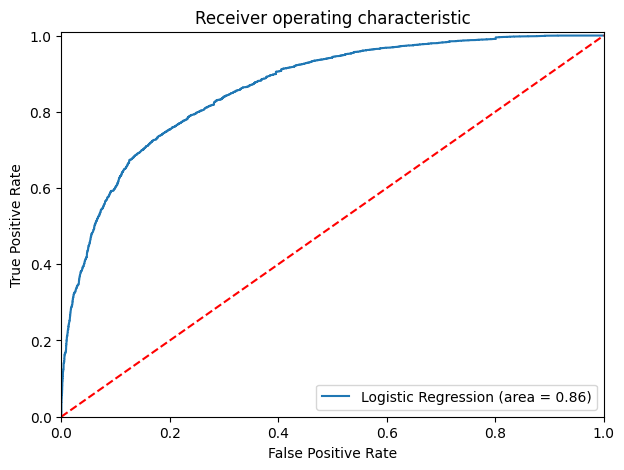

In [ ]:
# Building ROC curve on train set
logit_roc_auc_train = roc_auc_score(y_train, result1.predict(X_train3.astype(float)))
fpr, tpr, thresholds = roc_curve(y_train, result1.predict(X_train3.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

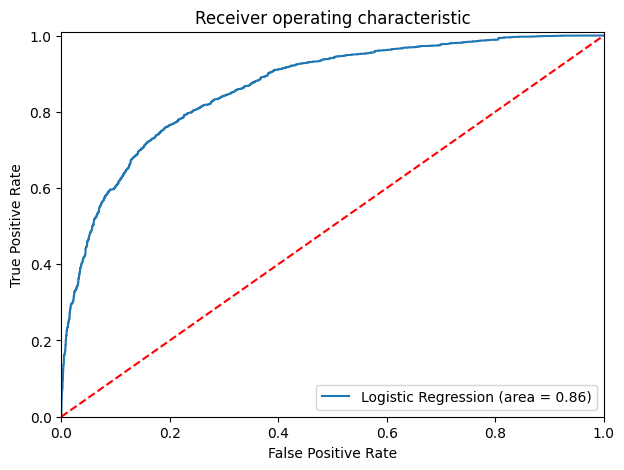

In [ ]:
# Building ROC curve on test set
logit_roc_auc_train = roc_auc_score(y_test, result1.predict(X_test3.astype(float)))
fpr, tpr, thresholds = roc_curve(y_test, result1.predict(X_test3.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, result1.predict(X_train3.astype(float)))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3696037915892956


In [ ]:
# defining model_performance_classification_statsmodels to check performances of train and test data
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    Creates and prints the confusion matrix for a statsmodels logistic regression model.

    Args:
        model: A fitted statsmodels model object.
        predictors: The predictor variables used in the model.
        target: The target variable.
        threshold: The probability threshold for classification.

    Returns:
        None (Prints the confusion matrix)
    """

    # Get predicted probabilities
    pred_probs = model.predict(predictors)

    # Convert probabilities to class predictions using the threshold
    pred_class = (pred_probs >= threshold).astype(int)

    # Create and print confusion matrix
    cm = confusion_matrix(target, pred_class)
    print("Confusion Matrix:")
    print(cm)

In [ ]:
# checking training model performance after getting threshold = 0.37
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    result1, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Accuracy: 0.7926512287334594
Precision: 0.6679679028410324
Recall: 0.7365777830921918
F1 Score: 0.7005970998009667
ROC AUC Score: 0.8626354608856783
Confusion Matrix:
[[13967  3062]
 [ 2203  6160]]
Training performance:


{'Accuracy': 0.7926512287334594,
 'Precision': 0.6679679028410324,
 'Recall': 0.7365777830921918,
 'F1 Score': 0.7005970998009667,
 'ROC AUC Score': 0.8626354608856783,
 'Confusion Matrix': array([[13967,  3062],
        [ 2203,  6160]])}

In [ ]:
# checking testing model performance after getting threshold = 0.37
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    result1, X_test3.astype(float), y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Accuracy: 0.7955526968666727
Precision: 0.6657296192179913
Recall: 0.7396365701306076
F1 Score: 0.7007397444519166
ROC AUC Score: 0.8637059495456239
Confusion Matrix:
[[6053 1308]
 [ 917 2605]]
Test performance:


{'Accuracy': 0.7955526968666727,
 'Precision': 0.6657296192179913,
 'Recall': 0.7396365701306076,
 'F1 Score': 0.7007397444519166,
 'ROC AUC Score': 0.8637059495456239,
 'Confusion Matrix': array([[6053, 1308],
        [ 917, 2605]])}

**Let's use precision curve to see if we find better threshold**

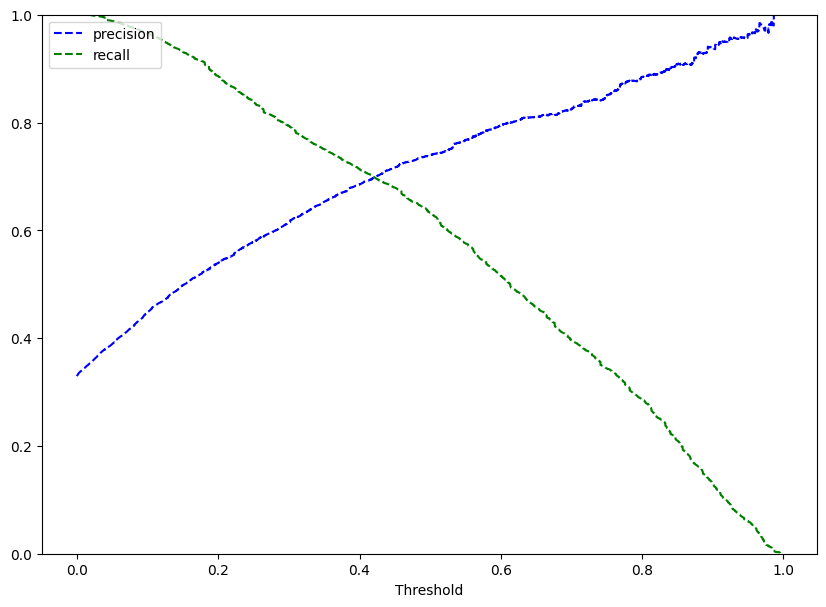

In [ ]:
# plotting precision-recall curve on training set
# predicting the value from X_train
y_pred_train = result1.predict(X_train3.astype(float))
prec, rec, tre = precision_recall_curve(y_train, y_pred_train) # calling the function for precision recall curve

# defining plot features
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# setting optimal threshold from the above precision-recall curve
optimal_threshold_curve = 0.42

In [ ]:
# defining model_performance_classification_statsmodels to check performances of train and test data
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    Creates and prints the confusion matrix for a statsmodels logistic regression model.

    Args:
        model: A fitted statsmodels model object.
        predictors: The predictor variables used in the model.
        target: The target variable.
        threshold: The probability threshold for classification.

    Returns:
        None (Prints the confusion matrix)
    """

    # Get predicted probabilities
    pred_probs = model.predict(predictors)

    # Convert probabilities to class predictions using the threshold
    pred_class = (pred_probs >= threshold).astype(int)

    # Create and print confusion matrix
    cm = confusion_matrix(target, pred_class)
    print("Confusion Matrix:")
    print(cm)

In [ ]:
# Checking training model performance from optimal_threshold_curve value = 0.42
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    result1, X_train3.astype(float), y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Accuracy: 0.8012759924385633
Precision: 0.6979353144766679
Recall: 0.699270596675834
F1 Score: 0.698602317524788
ROC AUC Score: 0.8626354608856783
Confusion Matrix:
[[14498  2531]
 [ 2515  5848]]
Training performance:


{'Accuracy': 0.8012759924385633,
 'Precision': 0.6979353144766679,
 'Recall': 0.699270596675834,
 'F1 Score': 0.698602317524788,
 'ROC AUC Score': 0.8626354608856783,
 'Confusion Matrix': array([[14498,  2531],
        [ 2515,  5848]])}

In [ ]:
# Checking testing model performance from optimal_threshold_curve value = 0.42
log_reg_model_test_perf = model_performance_classification_statsmodels(result1, X_test3.astype(float), y_test, threshold=optimal_threshold_curve) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Accuracy: 0.8036387025636313
Precision: 0.6938147215225301
Recall: 0.7038614423622942
F1 Score: 0.6988019732205779
ROC AUC Score: 0.8637059495456239
Confusion Matrix:
[[6267 1094]
 [1043 2479]]
Test performance:


{'Accuracy': 0.8036387025636313,
 'Precision': 0.6938147215225301,
 'Recall': 0.7038614423622942,
 'F1 Score': 0.6988019732205779,
 'ROC AUC Score': 0.8637059495456239,
 'Confusion Matrix': array([[6267, 1094],
        [1043, 2479]])}

**ROC curve on test set:**

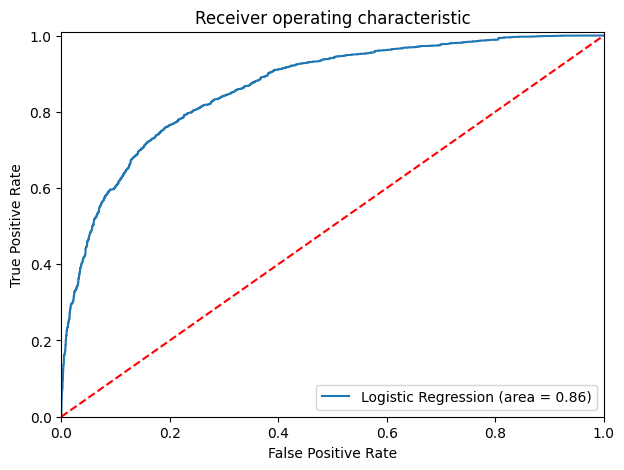

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, result1.predict(X_test3.astype(float)))
fpr, tpr, thresholds = roc_curve(y_test, result1.predict(X_test3.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Comapring all the values and choosing the best from default threshold, 0.37 threshold and 0.42 threshold:**

In [ ]:
# defining model_performance_classification_statsmodels to check performances of train and test data
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute and print the classification model performance metrics.

    Args:
        model: A fitted statsmodels model object.
        predictors: The predictor variables used in the model.
        target: The target variable.
        threshold: The probability threshold for classification.

    Returns:
        A dictionary containing the performance metrics.
    """

    # Get predicted probabilities
    pred_probs = model.predict(predictors)

    # Convert probabilities to class predictions using the threshold
    pred_class = (pred_probs >= threshold).astype(int)

    # Compute performance metrics
    accuracy = accuracy_score(target, pred_class)
    precision = precision_score(target, pred_class)
    recall = recall_score(target, pred_class)
    f1 = f1_score(target, pred_class)
    roc_auc = roc_auc_score(target, pred_probs)

    # Create confusion matrix
    cm = confusion_matrix(target, pred_class)

    # Store metrics in a dictionary
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC Score": roc_auc,
        "Confusion Matrix": cm
    }

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:")
    print(cm)

    # Return the metrics dictionary
    return metrics

In [ ]:
# training performance comparison

# Call the function and assign the returned dictionaries
log_reg_model_train_perf = model_performance_classification_statsmodels(result1, X_train3.astype(float), y_train)
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    result1, X_train3.astype(float), y_train, threshold=optimal_threshold_auc_roc
)
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    result1, X_train3.astype(float), y_train, threshold=optimal_threshold_curve
)

# Convert dictionaries to DataFrames for concatenation, excluding Confusion Matrix
log_reg_model_train_perf_df = pd.DataFrame({k: v for k, v in log_reg_model_train_perf.items() if k != 'Confusion Matrix'}, index=[0])
log_reg_model_train_perf_threshold_auc_roc_df = pd.DataFrame({k: v for k, v in log_reg_model_train_perf_threshold_auc_roc.items() if k != 'Confusion Matrix'}, index=[0])
log_reg_model_train_perf_threshold_curve_df = pd.DataFrame({k: v for k, v in log_reg_model_train_perf_threshold_curve.items() if k != 'Confusion Matrix'}, index=[0])


models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf_df,
        log_reg_model_train_perf_threshold_auc_roc_df,
        log_reg_model_train_perf_threshold_curve_df,
    ],
    axis=1,
    keys=[
        "Logistic Regression-default Threshold",
        "Logistic Regression-0.37 Threshold",
        "Logistic Regression-0.42 Threshold",
    ],  # Specify keys for each DataFrame
)


# Display the comparison of training performance
print("Training performance comparison:")
print(models_train_comp_df)

Accuracy: 0.805371770636421
Precision: 0.7389967863630013
Recall: 0.6324285543465263
F1 Score: 0.6815721649484536
ROC AUC Score: 0.8626354608856783
Confusion Matrix:
[[15161  1868]
 [ 3074  5289]]
Accuracy: 0.7926512287334594
Precision: 0.6679679028410324
Recall: 0.7365777830921918
F1 Score: 0.7005970998009667
ROC AUC Score: 0.8626354608856783
Confusion Matrix:
[[13967  3062]
 [ 2203  6160]]
Accuracy: 0.8012759924385633
Precision: 0.6979353144766679
Recall: 0.699270596675834
F1 Score: 0.698602317524788
ROC AUC Score: 0.8626354608856783
Confusion Matrix:
[[14498  2531]
 [ 2515  5848]]
Training performance comparison:
  Logistic Regression-default Threshold                             \
                               Accuracy Precision  Recall F1 Score   
0                               0.80537   0.73900 0.63243  0.68157   

                Logistic Regression-0.37 Threshold                             \
  ROC AUC Score                           Accuracy Precision  Recall F1 Score   
0  

Observations:

1. Logistic Regression - default Threshold(0.5):
Accuracy: 0.8053,
Precision: 0.7390,
Recall: 0.6324,
F1 Score: 0.6815,
ROC AUC Score: 0.8626
Confusion Matrix: (True positives: 15161, False Positives: 1868, False Negatives: 3074, True Negatives: 5289)

2. Logistic Regression - 0.37 Threshold:
Accuracy: 0.7926,
Precision: 0.6679,
Recall: 0.7365,
F1 Score: 0.7006,
ROC AUC Score: 0.8626
Confusion Matrix: (True positives: 13967, False Positives: 3062, False Negatives: 2203, True Negatives: 6160)

3. Logistic Regression - 0.42 Threshold:
Accuracy: 0.8012,
Precision: 0.6979,
Recall: 0.6992,
F1 Score: 0.6986,
ROC AUC Score: 0.8626
Confusion Matrix: (True positives: 14498, False Positives: 2531, False Negatives: 2515, True Negatives: 5848)


In [ ]:
# testing performance comparison

# Call the function and assign the returned dictionaries
log_reg_model_test_perf = model_performance_classification_statsmodels(result1, X_test3.astype(float), y_test) # Assigning the output to log_reg_model_test_perf
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels( # Assigning output to log_reg_model_test_perf_threshold_auc_roc
    result1, X_test3.astype(float), y_test, threshold=optimal_threshold_auc_roc
)
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels( # Assigning output to log_reg_model_test_perf_threshold_curve
    result1, X_test3.astype(float), y_test, threshold=optimal_threshold_curve
)

# Convert dictionaries to DataFrames for concatenation, excluding Confusion Matrix
log_reg_model_test_perf_df = pd.DataFrame({k: v for k, v in log_reg_model_test_perf.items() if k != 'Confusion Matrix'}, index=[0])
log_reg_model_test_perf_threshold_auc_roc_df = pd.DataFrame({k: v for k, v in log_reg_model_test_perf_threshold_auc_roc.items() if k != 'Confusion Matrix'}, index=[0]) # Using log_reg_model_test_perf_threshold_auc_roc
log_reg_model_test_perf_threshold_curve_df = pd.DataFrame({k: v for k, v in log_reg_model_test_perf_threshold_curve.items() if k != 'Confusion Matrix'}, index=[0]) # Using log_reg_model_test_perf_threshold_curve


models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf_df,
        log_reg_model_test_perf_threshold_auc_roc_df,
        log_reg_model_test_perf_threshold_curve_df,
    ],
    axis=1,
    keys=[
        "Logistic Regression-default Threshold",
        "Logistic Regression-0.37 Threshold",
        "Logistic Regression-0.42 Threshold",
    ],  # Specify keys for each DataFrame
)


# Display the comparison of training performance
print("Testing performance comparison:")
print(models_test_comp_df)

Accuracy: 0.8046494532757512
Precision: 0.729002624671916
Recall: 0.6308915388983533
F1 Score: 0.6764079147640791
ROC AUC Score: 0.8637059495456239
Confusion Matrix:
[[6535  826]
 [1300 2222]]
Accuracy: 0.7955526968666727
Precision: 0.6657296192179913
Recall: 0.7396365701306076
F1 Score: 0.7007397444519166
ROC AUC Score: 0.8637059495456239
Confusion Matrix:
[[6053 1308]
 [ 917 2605]]
Accuracy: 0.8036387025636313
Precision: 0.6938147215225301
Recall: 0.7038614423622942
F1 Score: 0.6988019732205779
ROC AUC Score: 0.8637059495456239
Confusion Matrix:
[[6267 1094]
 [1043 2479]]
Testing performance comparison:
  Logistic Regression-default Threshold                             \
                               Accuracy Precision  Recall F1 Score   
0                               0.80465   0.72900 0.63089  0.67641   

                Logistic Regression-0.37 Threshold                             \
  ROC AUC Score                           Accuracy Precision  Recall F1 Score   
0       0.8637

**Observations:**


1. Logistic Regression - default Threshold:
Accuracy: 0.8046,
Precision: 0.7290,
Recall: 0.6308,
F1 Score: 0.6764,
ROC AUC Score: 0.8637
Confusion Matrix: (True positives: 6535, False Positives: 826, False Negatives: 1300, True Negatives: 2222)

2. Logistic Regression - 0.37 Threshold:
Accuracy: 0.7955,
Precision: 0.6657,
Recall: 0.7396,
F1 Score: 0.7007,
ROC AUC Score: 0.8637
Confusion Matrix: (True positives: 6053, False Positives: 1308, False Negatives: 917, True Negatives: 2605)

3. Logistic Regression - 0.42 Threshold:
Accuracy: 0.8036,
Precision: 0.6938,
Recall: 0.7038,
F1 Score: 0.6988,
ROC AUC Score: 0.8637
Confusion Matrix: (True positives: 6267, False Positives: 1094, False Negatives: 1043, True Negatives: 2479)



# **Conclusion: **

Observations for train:

1. Logistic Regression - default Threshold(0.5):
Accuracy: 0.8053,
Precision: 0.7390,
Recall: 0.6324,
F1 Score: 0.6815,
ROC AUC Score: 0.8626
Confusion Matrix: (True positives: 15161, False Positives: 1868, False Negatives: 3074, True Negatives: 5289)

2. Logistic Regression - 0.37 Threshold:
Accuracy: 0.7926,
Precision: 0.6679,
Recall: 0.7365,
F1 Score: 0.7006,
ROC AUC Score: 0.8626
Confusion Matrix: (True positives: 13967, False Positives: 3062, False Negatives: 2203, True Negatives: 6160)

3. Logistic Regression - 0.42 Threshold:
Accuracy: 0.8012,
Precision: 0.6979,
Recall: 0.6992,
F1 Score: 0.6986,
ROC AUC Score: 0.8626
Confusion Matrix: (True positives: 14498, False Positives: 2531, False Negatives: 2515, True Negatives: 5848)


Observations for test:


1. Logistic Regression - default Threshold:
Accuracy: 0.8046,
Precision: 0.7290,
Recall: 0.6308,
F1 Score: 0.6764,
ROC AUC Score: 0.8637
Confusion Matrix: (True positives: 6535, False Positives: 826, False Negatives: 1300, True Negatives: 2222)

2. Logistic Regression - 0.37 Threshold:
Accuracy: 0.7955,
Precision: 0.6657,
Recall: 0.7396,
F1 Score: 0.7007,
ROC AUC Score: 0.8637
Confusion Matrix: (True positives: 6053, False Positives: 1308, False Negatives: 917, True Negatives: 2605)

3. Logistic Regression - 0.42 Threshold:
Accuracy: 0.8036,
Precision: 0.6938,
Recall: 0.7038,
F1 Score: 0.6988,
ROC AUC Score: 0.8637
Confusion Matrix: (True positives: 6267, False Positives: 1094, False Negatives: 1043, True Negatives: 2479)


I think all the three models are good fit according to different specifications. 0.5 threshold model will give highest true positives and true negatives. 0.37 threshold model will give lowest false negatives. 0.42 threshold model will generate lesse false positives compare to 0.37 threshold model.


Hence, looking into acc, recall, f1, precision scores, it seems like 0.42 threshold model has well balanced performance score.


## Building a Decision Tree model

In [ ]:
# splitting train-test set for building decision tree
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Cheking shape of all 4 sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25392, 27), (10883, 27), (25392,), (10883,))

In [ ]:
# checking unique value of y_train
y_train.unique()

array(['Canceled', 'Not_Canceled'], dtype=object)

In [ ]:
# checking unique values of y_test
y_test.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
# restructuring y_train and y_test
y_train = y_train.map({'Not_Canceled':0, 'Canceled':1})
y_test = y_test.map({'Not_Canceled':0, 'Canceled':1})

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining function confusion_matrix_sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# fitting training model in decision tree classifier
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train.astype(float), y_train)

DecisionTreeClassifier(random_state=1)

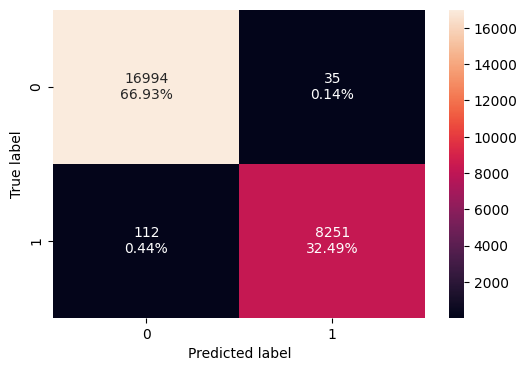

In [ ]:
# checking confusion matrix of model
confusion_matrix_sklearn(model_dt, X_train.astype(float), y_train)

In [ ]:
# checking performance of training model
decision_tree_perf_train = model_performance_classification_sklearn(model_dt, X_train.astype(float), y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

**Performance check on test data:**

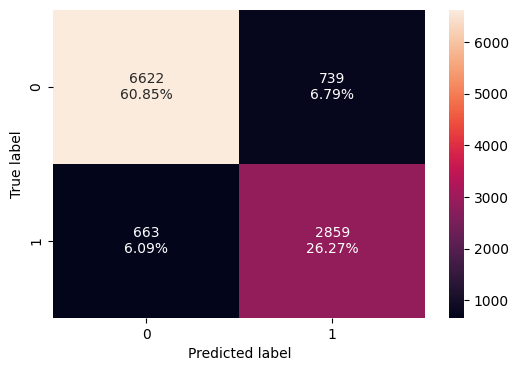

In [ ]:
# Confusion matrix of test set
confusion_matrix_sklearn(model_dt, X_test.astype(float), y_test)

In [ ]:
# checking performance of test set
decision_tree_perf_test = model_performance_classification_sklearn(model_dt, X_test.astype(float), y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

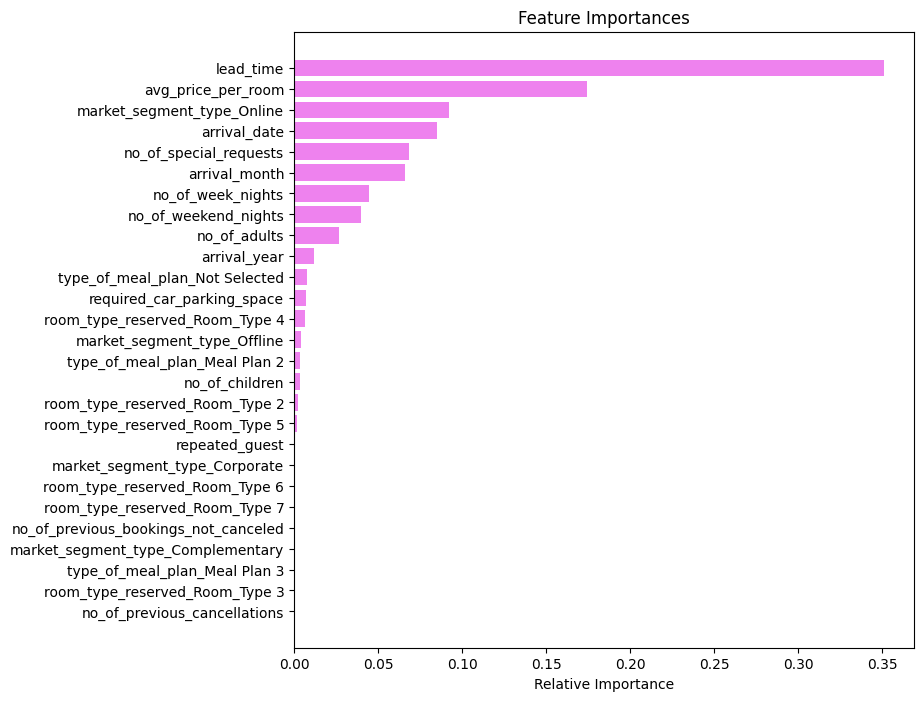

In [ ]:
# Checking important features of train set
feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**


From Important features from original model, to predict booking cancellation, lead time variable plays most important role followed by avg_price_per_room, market_segment_online, arrival_date etc.

## Do we need to prune the tree?

## **Yes, we will start with pre-pruning the tree:**

In [ ]:
# pre-pruning decision tree
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

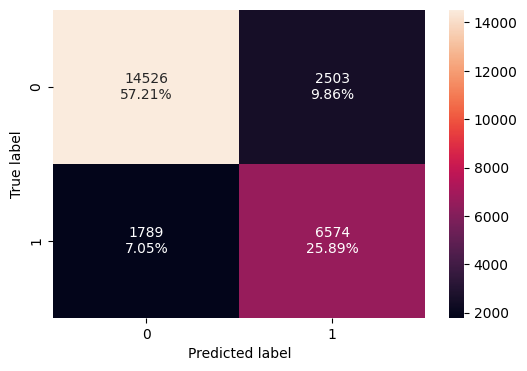

In [ ]:
# confusion matrix of pre-pruned tree of train set
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# performance of pre-pruned tree of train set
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train.astype(float), y_train)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

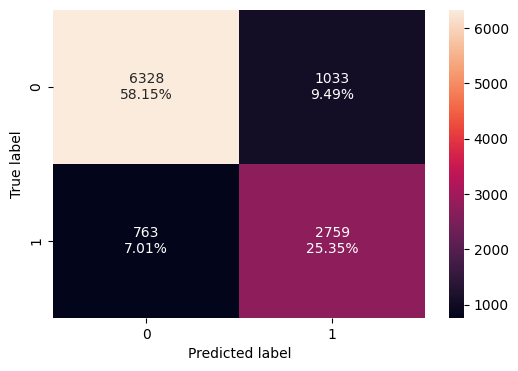

In [ ]:
# confusion matrix of pre-pruned tree of test set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
# performance of pre-pruned tree of test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test.astype(float), y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

In [ ]:
# checking estimator score of train and test data
print(estimator.score(X_train, y_train))
print(estimator.score(X_test, y_test))

# Using recall_score directly, providing y_true and y_pred
recall_train = recall_score(y_train, estimator.predict(X_train))
recall_test = recall_score(y_test, estimator.predict(X_test))
print("Recall on training set:", recall_train)
print("Recall on testing set:", recall_test)

0.8309703843730308
0.8349719746393458
Recall on training set: 0.786081549683128
Recall on testing set: 0.7833617262918796


## **Visualizing Pre-pruned Tree and checking important features:**

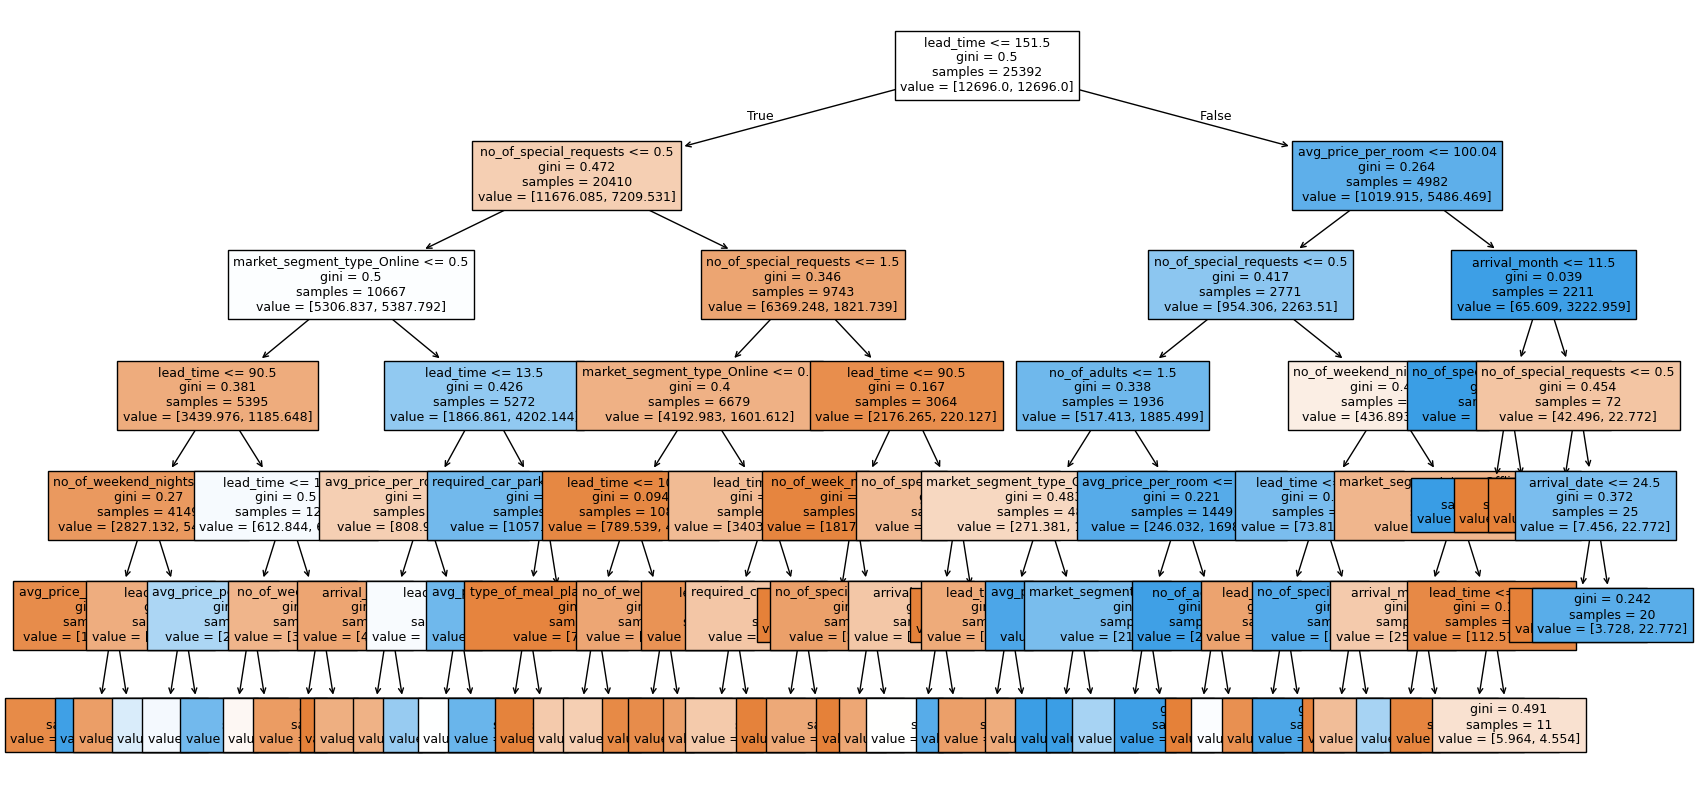

In [ ]:
# visual representation of pre-pruned tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

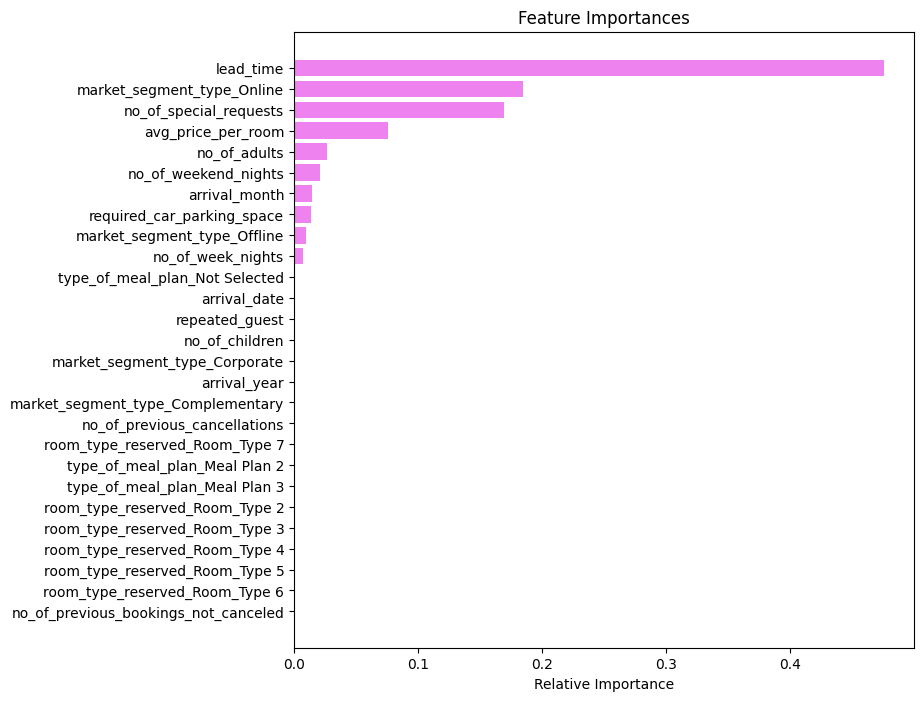

In [ ]:
# important features of pre-pruned tree

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**

From important features of pre-pruned model, again lead time plays major role followed by market_segment_type_online, no_of_special_requests, avg_price_per_room etc.

## **Let's try post pruning through cost complexity pruning:**

In [ ]:
# assigning clf with decision tree classifier
# through cost complexity, visualizing impurities of nodes
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# assigning individual dataframe to path
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1853     0.00890     0.32806
1854     0.00980     0.33786
1855     0.01272     0.35058
1856     0.03412     0.41882
1857     0.08118     0.50000

[1858 rows x 2 columns]

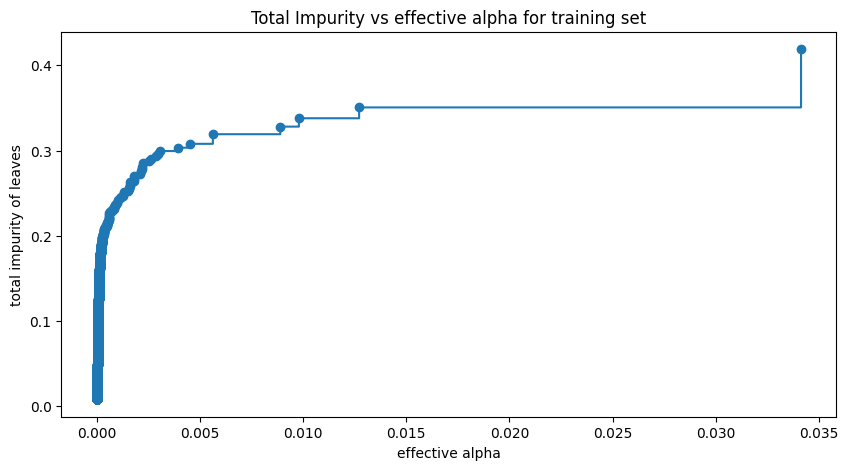

In [ ]:
# plotting ccp_alpha vs impurities
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Observation:** higher the effective alpha, higher will be the impurity

Train decision tree using effective alpha. The last ccp_alpha of the tree is one which has pruned whole tree, leaving the tree [:-1] to one node

In [ ]:
# fitting X_train data in clf to determine alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train.astype(float), y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


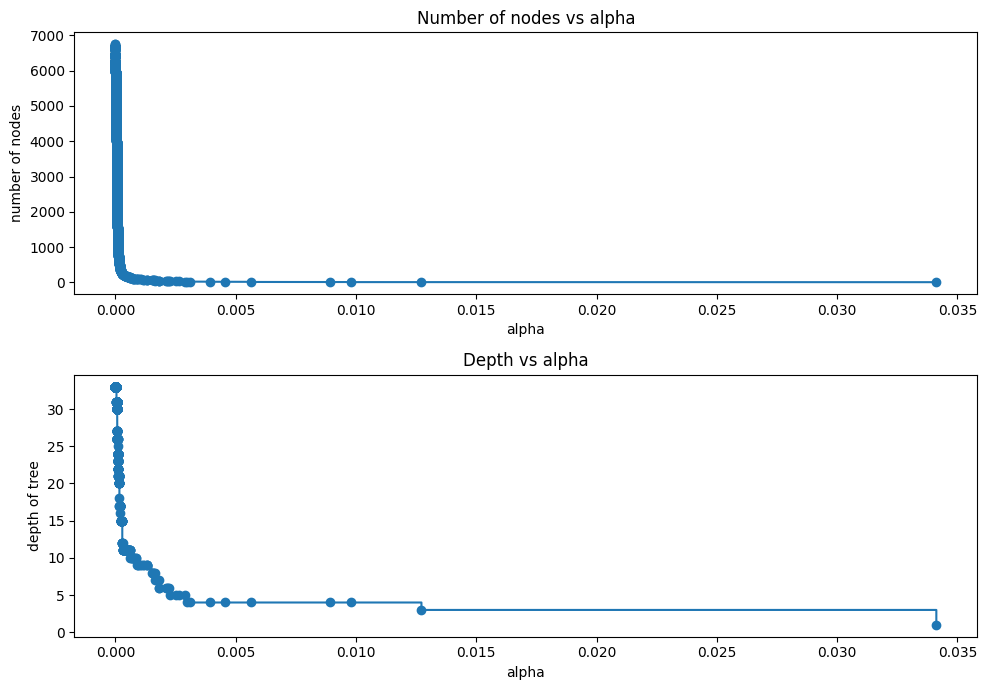

In [ ]:
# plotting no of nodes vs alpha graph
# plotting depth of tree vs alpha graph
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Observations: **

Higher alpha values means lower depth and numner of nodes.

F1 score vs alpha for train and test set:

In [ ]:
# Calculating the F1 score for train and test set
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train.astype(float))
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test.astype(float))
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

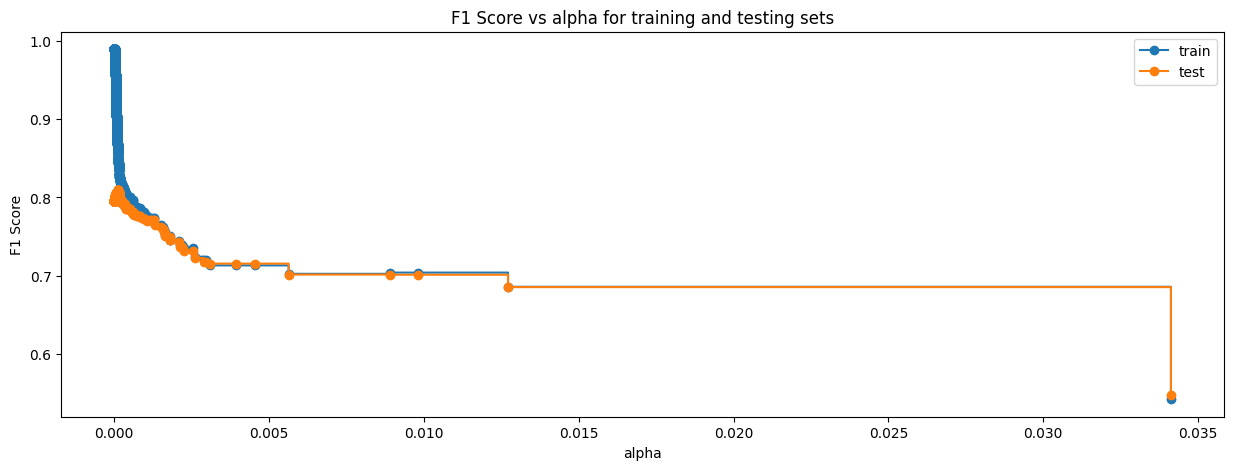

In [ ]:
# plotting graph of F1 score vs alpha for train and test data
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# assigning best model from above graph with best F1 score and lower alpha for test set
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167048,
                       class_weight='balanced', random_state=1)


**Checking performance on training and testing set:**

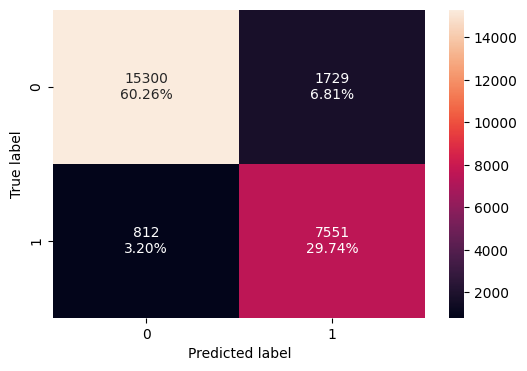

In [ ]:
# confusion model for train set of best model
confusion_matrix_sklearn(best_model, X_train.astype(float), y_train)

In [ ]:
# performance of train data of best model
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train.astype(float), y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89993 0.90291    0.81369 0.85598

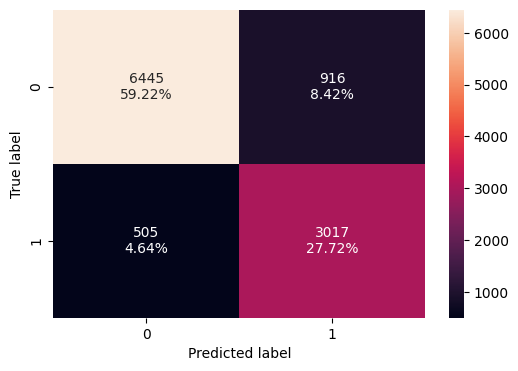

In [ ]:
# confusion matrix of best model of test set
confusion_matrix_sklearn(best_model, X_test.astype(float), y_test)

In [ ]:
# performance of best model of test set
decision_tree_post_perf_test = model_performance_classification_sklearn(best_model, X_test.astype(float), y_test)
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.86943 0.85662    0.76710 0.80939

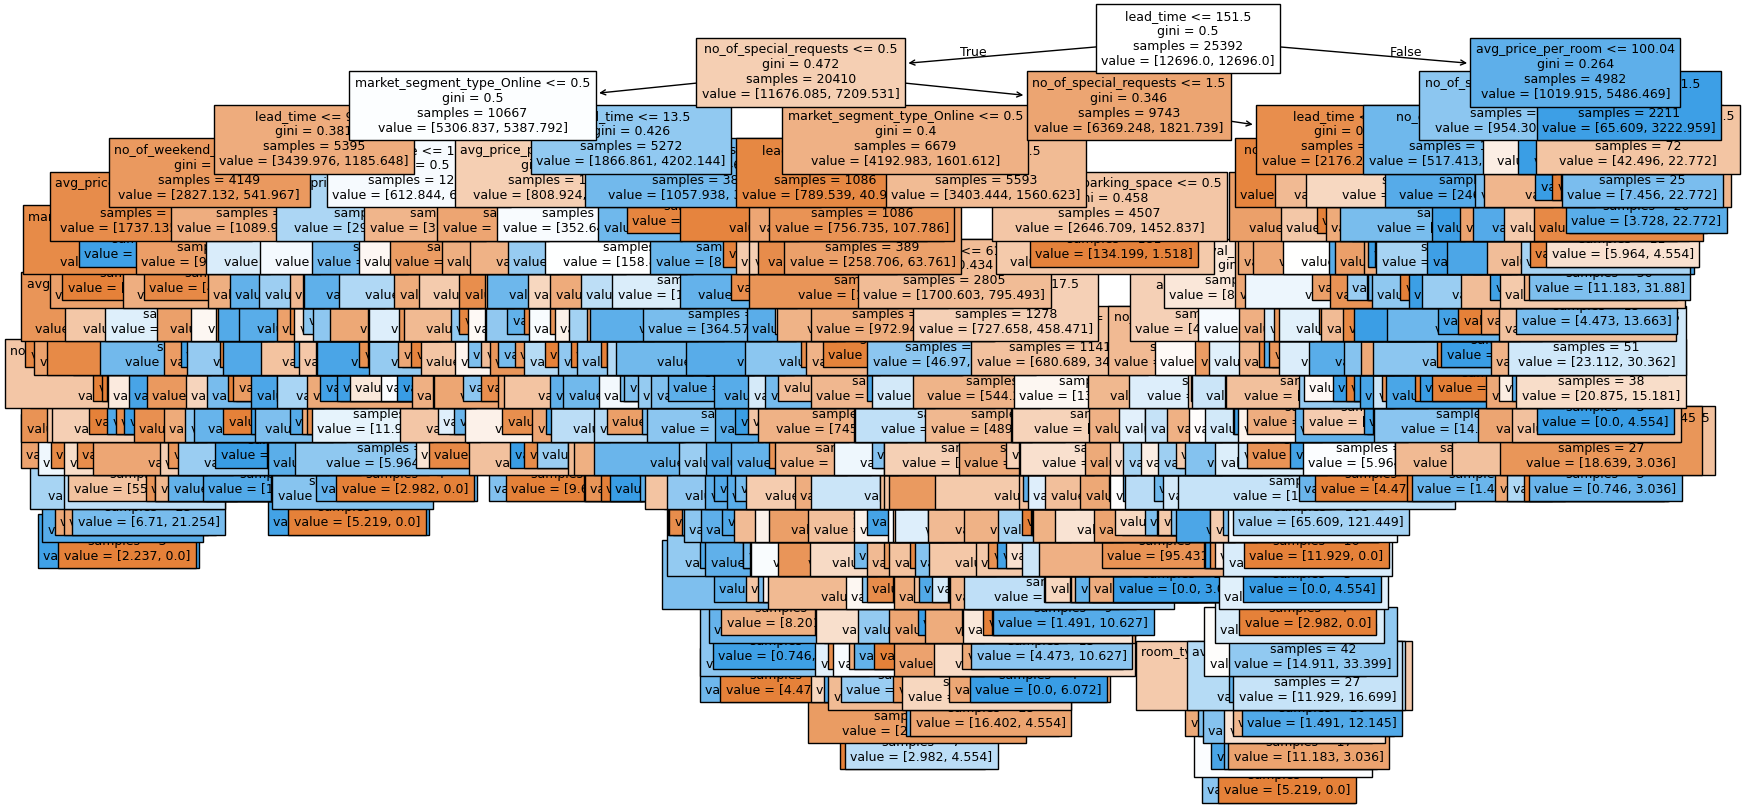

In [ ]:
# plotting tree of best model
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

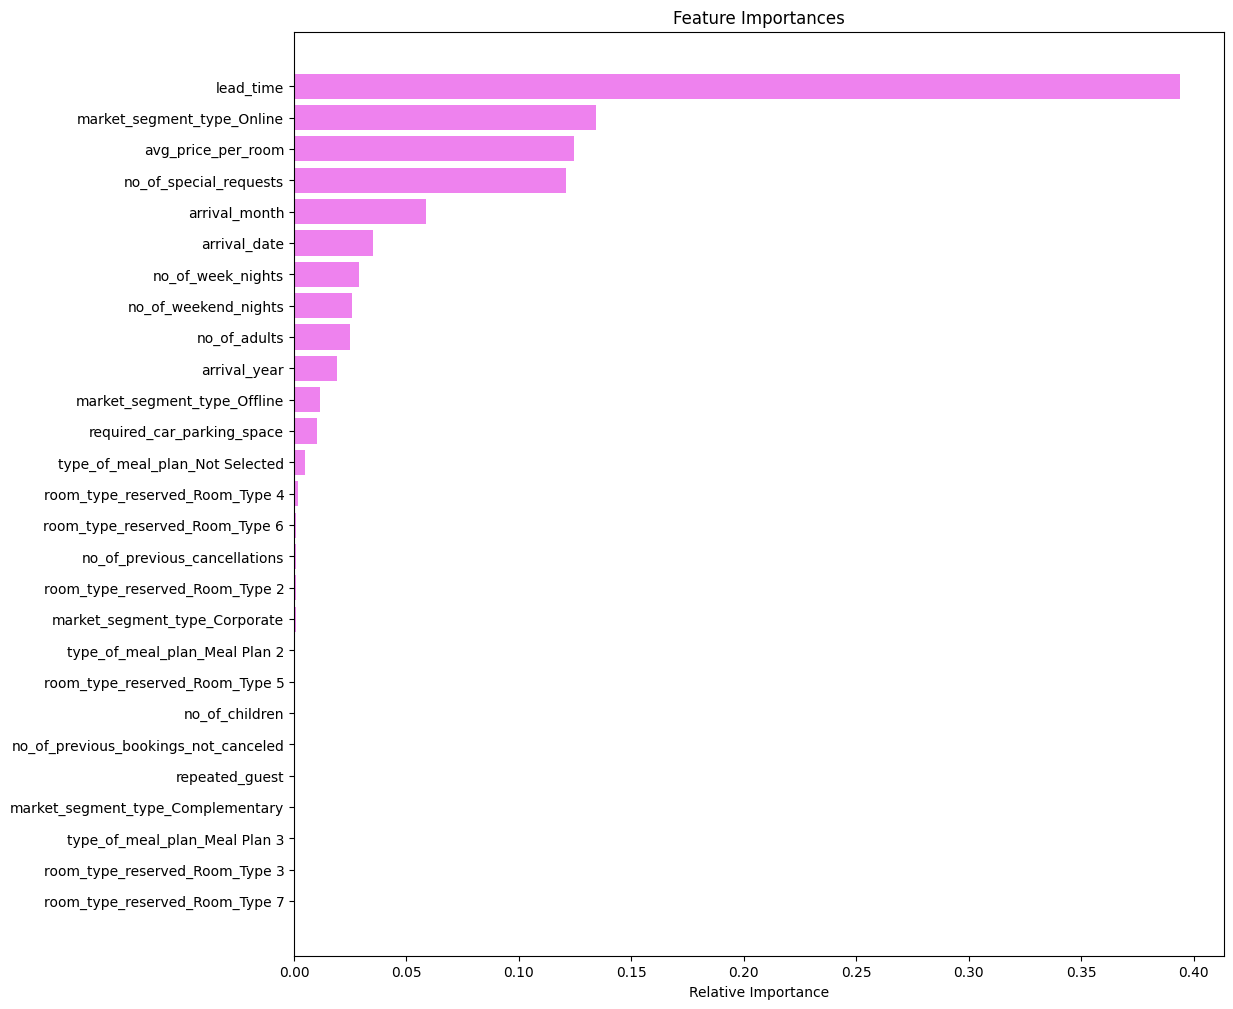

In [ ]:
# important features of best model tree
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Obervations: **

From important features from post pruned model to predict booking cancellation, lead time plays major role followed by market_segment_online, avg_price_pre_room, no_of_special_requests, arrival_month, arrival_date etc.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison of decision tree

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83097   
Recall                   0.98661                      0.78608   
Precision                0.99578                      0.72425   
F1                       0.99117                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89993  
Recall                          0.90291  
Precision                       0.81369  
F1                              0.85598

In [ ]:
# training performance comparison of decision tree

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87118                      0.83497   
Recall                   0.81175                      0.78336   
Precision                0.79461                      0.72758   
F1                       0.80309                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86943  
Recall                          0.85662  
Precision                       0.76710  
F1                              0.80939

**Observations:**

As per the results, post-pruning showed best performance overall with high F1 score as well as better accuracy, recall and precision score.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

**Profitable policies for cancellations and refunds to adopt as well as other recommendations: **

1. **Targeted marketing:** With increase in no_of_adults, no_of_weekend_nights, no_of_week_nights, lead_time may suggest higher cancellation risk, offering discounts or additional perks such as flexible cancellation policies, meal offering could retain such bookings
2. **Discounts for longer lead time and stay:** Based on higher lead_time or longer length of stay, to incentivize guests to commit by adjusting pricing strategy.
3. **Collecting Deposits:** Implementing pre-booking strategies, which means collecting deposits while booking can lower the risk of cancellations
4. **Loyalty programs for repeated guests:** Repeated guests are less likely to cancel their bookings, creating loyalty programs or offering exclusive offers could increase retention rates.
5. **Discounts for corpotate guests:** Corporate segments tend to cancel less, to attract corporate clients, offering bulk booking discounts, conference rooms, business amenities could prove effective
6. **Clear advertisement:** If required_car_parking_space is important for guests, ensuring that this is clearly advertised on website and other booking platforms might decrease cancellation
7. **Packages for specific room types:** Guests selecting specific room types (2,4,5,6,7) might have higher commitment to booking, offering packages that focus on there popular room types could help boost conversion rates.
8. **Reminder emails:** Sending reminder emails or notification as the booking date approaches to reaffirm their commitment.
9. **Online booking perks:** While online booking are more common, offering special perks such as discounts for non-refundable bookings or loyalty points for online reservations can encourage customers to follow their booking
10. **Offer price flexibility:** For higher priced rooms, offering flexible cancellation policies such as free cancellations upto 48hr before check-in date could decrease cancellations.
11. **Special requests adjustments:** Consider introducing a confirmation step for special requests during the booking process to ensure the hotel can fulfil those requests. And if special requests are not immediately available, offer alternative option or discounted services to prevent cancellations
12. **Early bird rates:** offering early bird rates for customers who book months in advance, locking them with special pricing and minimizing the chance of last minute cancellations
13. **Non-refundable pricing on high demand:** Non-refundable pricing for customers who are sure about their bookings during high demend period such as August, September and October.
14. **Cancellation fee:** Implementing graduated cancellation fee structure based on how close the cancellation is to the arrival date.